In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import array
import glob
import time
import csv
import os
import re
import random
from random import shuffle

#### 1. Import all training images, create superX array which contains the image, name, and label for each training image

In [5]:
num_train_img1 = 1700  #for labels 2,5,6 (due to smaller amount of images in categories 'bicycle', 
                       # 'motorcycle' and 'non-motorized vehicle')
num_train_img2 = 5000  #the rest except for 4
num_train_img3 = 10000  #for label 4 (huge amount of images in the 'car')

# create lists to store the images and image names
artic_truck = []
background = []
bicycle = []
bus = []
car = []
motorcycle = []
nonM_vehicle = []
pedes = []
pickup_truck = []
su_truck = []
work_van = []


artic_truck_name = []
background_name = []
bicycle_name = []
bus_name = []
car_name = []
motorcycle_name = []
nonM_vehicle_name = []
pedes_name = []
pickup_truck_name = []
su_truck_name = []
work_van_name = []

# images are randomly selected from corresponding folders
for i in range(num_train_img2):
    name = random.choice(os.listdir("./train/articulated_truck/"))
    m = re.search('0(.+?).jpg', name)
    if m:
        found = m.group(1)
        found = int(float(found))
    artic_truck_name.append(found)
    
    path = './train/articulated_truck/%s' % name
    artic_truck.append(path)
    print("done1 ", i)

    
for i in range(num_train_img2):
    name = random.choice(os.listdir("./train/background/"))
    m = re.search('0(.+?).jpg', name)
    if m:
        found = m.group(1)
        found = int(float(found))
    background_name.append(found)
    
    path = './train/background/%s' % name
    background.append(path)
    print("done2 ", i)


for i in range(num_train_img1):
    name = random.choice(os.listdir("./train/bicycle/"))
    m = re.search('0(.+?).jpg', name)
    if m:
        found = m.group(1)
        found = int(float(found))
    bicycle_name.append(found)
    
    path = './train/bicycle/%s' % name
    bicycle.append(path) 
    print("done3 ", i)
    
    
for i in range(num_train_img2):
    name = random.choice(os.listdir("./train/bus/"))
    m = re.search('0(.+?).jpg', name)
    if m:
        found = m.group(1)
        found = int(float(found))
    bus_name.append(found)
    
    path = './train/bus/%s' % name
    bus.append(path) 
    print("done4 ", i)
    
    
for i in range(num_train_img3):
    name = random.choice(os.listdir("./train/car/"))
    m = re.search('0(.+?).jpg', name)
    if m:
        found = m.group(1)
        found = int(float(found))
    car_name.append(found)
    
    path = './train/car/%s' % name
    car.append(path)   
    print("done5 ", i)
    
for i in range(num_train_img1):
    name = random.choice(os.listdir("./train/motorcycle/"))
    m = re.search('0(.+?).jpg', name)
    if m:
        found = m.group(1)
        found = int(float(found))
    motorcycle_name.append(found)
    
    path = './train/motorcycle/%s' % name   
    motorcycle.append(path)
    print("done6 ", i)

for i in range(num_train_img1):
    name = random.choice(os.listdir("./train/non-motorized_vehicle/"))
    m = re.search('0(.+?).jpg', name)
    if m:
        found = m.group(1)
        found = int(float(found))
    nonM_vehicle_name.append(found)
    
    path = './train/non-motorized_vehicle/%s' % name
    nonM_vehicle.append(path) 
    print("done7 ", i)
    
    
for i in range(num_train_img2):
    name = random.choice(os.listdir("./train/pedestrian/"))
    m = re.search('0(.+?).jpg', name)
    if m:
        found = m.group(1)
        found = int(float(found))
    pedes_name.append(found)
    
    path = './train/pedestrian/%s' % name
    pedes.append(path)
    print("done8 ", i)
    

for i in range(num_train_img2):
    name = random.choice(os.listdir("./train/pickup_truck/"))
    m = re.search('0(.+?).jpg', name)
    if m:
        found = m.group(1)
        found = int(float(found))
    pickup_truck_name.append(found)
    
    path = './train/pickup_truck/%s' % name
    pickup_truck.append(path)
    print("done9 ", i)

    
for i in range(num_train_img2):
    name = random.choice(os.listdir("./train/single_unit_truck/"))
    m = re.search('0(.+?).jpg', name)
    if m:
        found = m.group(1)
        found = int(float(found))
    su_truck_name.append(found)
    
    path = './train/single_unit_truck/%s' % name
    su_truck.append(path) 
    print("done10 ", i)


for i in range(num_train_img2):
    name = random.choice(os.listdir("./train/work_van/"))
    m = re.search('0(.+?).jpg', name)
    if m:
        found = m.group(1)
        found = int(float(found))
    work_van_name.append(found)
    
    path = './train/work_van/%s' % name
    work_van.append(path)
    print("done11 ", i)
    
    
# X = training_image 
# X = [artic_truck,background,bicycle,bus,car,motorcycle,nonM_vehicle,
#      pedes,pickup_truck,su_truck,work_van]
X = []
X.append(artic_truck)
X.append(background)
X.append(bicycle)
X.append(bus)
X.append(car)
X.append(motorcycle)
X.append(nonM_vehicle)
X.append(pedes)
X.append(pickup_truck)
X.append(su_truck)
X.append(work_van)


# X_name = training_name (the numbers --> 00053672, etc)
X_name = []
X_name.append(artic_truck_name)
X_name.append(background_name)
X_name.append(bicycle_name)
X_name.append(bus_name)
X_name.append(car_name)
X_name.append(motorcycle_name)
X_name.append(nonM_vehicle_name)
X_name.append(pedes_name)
X_name.append(pickup_truck_name)
X_name.append(su_truck_name)
X_name.append(work_van_name)

# X_label = training_label (artic_truck = 0, background = 1,....)
X_label= []
length = 0
for i in range(11):
    if (i==2 or i==5 or i==6):
        length = num_train_img1  #1700 for bicycle, motorcycle, nonM_vehicle
    elif(i==4):
        length = num_train_img3  #10000 for car
    else:
        length = num_train_img2  #5000 for all other categories
    for j in range(length):
        X_label.append(i)


# superX = [[img1, name1, label1],[img2, name2, label2]......]
superX = []
element = []
length = 0
total_length = 0
for i in range(11):
    if (i==2 or i==5 or i==6):
        length = num_train_img1  #1700 for bicycle, motorcycle, nonM_vehicle
    elif(i==4):
        length = num_train_img3  #10000 for car
    else:
        length = num_train_img2  #5000 for all the other categories
    
    for j in range(length):
        element.append(X[i][j])
        element.append(X_name[i][j])
        element.append(X_label[total_length+j])
        superX.append(element)
        element = []
    total_length += length
    print(i)
print("done")

done1  0
done1  1
done1  2
done1  3
done1  4
done1  5
done1  6
done1  7
done1  8
done1  9
done1  10
done1  11
done1  12
done1  13
done1  14
done1  15
done1  16
done1  17
done1  18
done1  19
done1  20
done1  21
done1  22
done1  23
done1  24
done1  25
done1  26
done1  27
done1  28
done1  29
done1  30
done1  31
done1  32
done1  33
done1  34
done1  35
done1  36
done1  37
done1  38
done1  39
done1  40
done1  41
done1  42
done1  43
done1  44
done1  45
done1  46
done1  47
done1  48
done1  49
done1  50
done1  51
done1  52
done1  53
done1  54
done1  55
done1  56
done1  57
done1  58
done1  59
done1  60
done1  61
done1  62
done1  63
done1  64
done1  65
done1  66
done1  67
done1  68
done1  69
done1  70
done1  71
done1  72
done1  73
done1  74
done1  75
done1  76
done1  77
done1  78
done1  79
done1  80
done1  81
done1  82
done1  83
done1  84
done1  85
done1  86
done1  87
done1  88
done1  89
done1  90
done1  91
done1  92
done1  93
done1  94
done1  95
done1  96
done1  97
done1  98
done1  99
done1  100

done1  764
done1  765
done1  766
done1  767
done1  768
done1  769
done1  770
done1  771
done1  772
done1  773
done1  774
done1  775
done1  776
done1  777
done1  778
done1  779
done1  780
done1  781
done1  782
done1  783
done1  784
done1  785
done1  786
done1  787
done1  788
done1  789
done1  790
done1  791
done1  792
done1  793
done1  794
done1  795
done1  796
done1  797
done1  798
done1  799
done1  800
done1  801
done1  802
done1  803
done1  804
done1  805
done1  806
done1  807
done1  808
done1  809
done1  810
done1  811
done1  812
done1  813
done1  814
done1  815
done1  816
done1  817
done1  818
done1  819
done1  820
done1  821
done1  822
done1  823
done1  824
done1  825
done1  826
done1  827
done1  828
done1  829
done1  830
done1  831
done1  832
done1  833
done1  834
done1  835
done1  836
done1  837
done1  838
done1  839
done1  840
done1  841
done1  842
done1  843
done1  844
done1  845
done1  846
done1  847
done1  848
done1  849
done1  850
done1  851
done1  852
done1  853
done1  854

done1  1468
done1  1469
done1  1470
done1  1471
done1  1472
done1  1473
done1  1474
done1  1475
done1  1476
done1  1477
done1  1478
done1  1479
done1  1480
done1  1481
done1  1482
done1  1483
done1  1484
done1  1485
done1  1486
done1  1487
done1  1488
done1  1489
done1  1490
done1  1491
done1  1492
done1  1493
done1  1494
done1  1495
done1  1496
done1  1497
done1  1498
done1  1499
done1  1500
done1  1501
done1  1502
done1  1503
done1  1504
done1  1505
done1  1506
done1  1507
done1  1508
done1  1509
done1  1510
done1  1511
done1  1512
done1  1513
done1  1514
done1  1515
done1  1516
done1  1517
done1  1518
done1  1519
done1  1520
done1  1521
done1  1522
done1  1523
done1  1524
done1  1525
done1  1526
done1  1527
done1  1528
done1  1529
done1  1530
done1  1531
done1  1532
done1  1533
done1  1534
done1  1535
done1  1536
done1  1537
done1  1538
done1  1539
done1  1540
done1  1541
done1  1542
done1  1543
done1  1544
done1  1545
done1  1546
done1  1547
done1  1548
done1  1549
done1  1550
done

done1  2165
done1  2166
done1  2167
done1  2168
done1  2169
done1  2170
done1  2171
done1  2172
done1  2173
done1  2174
done1  2175
done1  2176
done1  2177
done1  2178
done1  2179
done1  2180
done1  2181
done1  2182
done1  2183
done1  2184
done1  2185
done1  2186
done1  2187
done1  2188
done1  2189
done1  2190
done1  2191
done1  2192
done1  2193
done1  2194
done1  2195
done1  2196
done1  2197
done1  2198
done1  2199
done1  2200
done1  2201
done1  2202
done1  2203
done1  2204
done1  2205
done1  2206
done1  2207
done1  2208
done1  2209
done1  2210
done1  2211
done1  2212
done1  2213
done1  2214
done1  2215
done1  2216
done1  2217
done1  2218
done1  2219
done1  2220
done1  2221
done1  2222
done1  2223
done1  2224
done1  2225
done1  2226
done1  2227
done1  2228
done1  2229
done1  2230
done1  2231
done1  2232
done1  2233
done1  2234
done1  2235
done1  2236
done1  2237
done1  2238
done1  2239
done1  2240
done1  2241
done1  2242
done1  2243
done1  2244
done1  2245
done1  2246
done1  2247
done

done1  2856
done1  2857
done1  2858
done1  2859
done1  2860
done1  2861
done1  2862
done1  2863
done1  2864
done1  2865
done1  2866
done1  2867
done1  2868
done1  2869
done1  2870
done1  2871
done1  2872
done1  2873
done1  2874
done1  2875
done1  2876
done1  2877
done1  2878
done1  2879
done1  2880
done1  2881
done1  2882
done1  2883
done1  2884
done1  2885
done1  2886
done1  2887
done1  2888
done1  2889
done1  2890
done1  2891
done1  2892
done1  2893
done1  2894
done1  2895
done1  2896
done1  2897
done1  2898
done1  2899
done1  2900
done1  2901
done1  2902
done1  2903
done1  2904
done1  2905
done1  2906
done1  2907
done1  2908
done1  2909
done1  2910
done1  2911
done1  2912
done1  2913
done1  2914
done1  2915
done1  2916
done1  2917
done1  2918
done1  2919
done1  2920
done1  2921
done1  2922
done1  2923
done1  2924
done1  2925
done1  2926
done1  2927
done1  2928
done1  2929
done1  2930
done1  2931
done1  2932
done1  2933
done1  2934
done1  2935
done1  2936
done1  2937
done1  2938
done

done1  3542
done1  3543
done1  3544
done1  3545
done1  3546
done1  3547
done1  3548
done1  3549
done1  3550
done1  3551
done1  3552
done1  3553
done1  3554
done1  3555
done1  3556
done1  3557
done1  3558
done1  3559
done1  3560
done1  3561
done1  3562
done1  3563
done1  3564
done1  3565
done1  3566
done1  3567
done1  3568
done1  3569
done1  3570
done1  3571
done1  3572
done1  3573
done1  3574
done1  3575
done1  3576
done1  3577
done1  3578
done1  3579
done1  3580
done1  3581
done1  3582
done1  3583
done1  3584
done1  3585
done1  3586
done1  3587
done1  3588
done1  3589
done1  3590
done1  3591
done1  3592
done1  3593
done1  3594
done1  3595
done1  3596
done1  3597
done1  3598
done1  3599
done1  3600
done1  3601
done1  3602
done1  3603
done1  3604
done1  3605
done1  3606
done1  3607
done1  3608
done1  3609
done1  3610
done1  3611
done1  3612
done1  3613
done1  3614
done1  3615
done1  3616
done1  3617
done1  3618
done1  3619
done1  3620
done1  3621
done1  3622
done1  3623
done1  3624
done

done1  4232
done1  4233
done1  4234
done1  4235
done1  4236
done1  4237
done1  4238
done1  4239
done1  4240
done1  4241
done1  4242
done1  4243
done1  4244
done1  4245
done1  4246
done1  4247
done1  4248
done1  4249
done1  4250
done1  4251
done1  4252
done1  4253
done1  4254
done1  4255
done1  4256
done1  4257
done1  4258
done1  4259
done1  4260
done1  4261
done1  4262
done1  4263
done1  4264
done1  4265
done1  4266
done1  4267
done1  4268
done1  4269
done1  4270
done1  4271
done1  4272
done1  4273
done1  4274
done1  4275
done1  4276
done1  4277
done1  4278
done1  4279
done1  4280
done1  4281
done1  4282
done1  4283
done1  4284
done1  4285
done1  4286
done1  4287
done1  4288
done1  4289
done1  4290
done1  4291
done1  4292
done1  4293
done1  4294
done1  4295
done1  4296
done1  4297
done1  4298
done1  4299
done1  4300
done1  4301
done1  4302
done1  4303
done1  4304
done1  4305
done1  4306
done1  4307
done1  4308
done1  4309
done1  4310
done1  4311
done1  4312
done1  4313
done1  4314
done

done1  4924
done1  4925
done1  4926
done1  4927
done1  4928
done1  4929
done1  4930
done1  4931
done1  4932
done1  4933
done1  4934
done1  4935
done1  4936
done1  4937
done1  4938
done1  4939
done1  4940
done1  4941
done1  4942
done1  4943
done1  4944
done1  4945
done1  4946
done1  4947
done1  4948
done1  4949
done1  4950
done1  4951
done1  4952
done1  4953
done1  4954
done1  4955
done1  4956
done1  4957
done1  4958
done1  4959
done1  4960
done1  4961
done1  4962
done1  4963
done1  4964
done1  4965
done1  4966
done1  4967
done1  4968
done1  4969
done1  4970
done1  4971
done1  4972
done1  4973
done1  4974
done1  4975
done1  4976
done1  4977
done1  4978
done1  4979
done1  4980
done1  4981
done1  4982
done1  4983
done1  4984
done1  4985
done1  4986
done1  4987
done1  4988
done1  4989
done1  4990
done1  4991
done1  4992
done1  4993
done1  4994
done1  4995
done1  4996
done1  4997
done1  4998
done1  4999
done2  0
done2  1
done2  2
done2  3
done2  4
done2  5
done2  6
done2  7
done2  8
done2  

done2  673
done2  674
done2  675
done2  676
done2  677
done2  678
done2  679
done2  680
done2  681
done2  682
done2  683
done2  684
done2  685
done2  686
done2  687
done2  688
done2  689
done2  690
done2  691
done2  692
done2  693
done2  694
done2  695
done2  696
done2  697
done2  698
done2  699
done2  700
done2  701
done2  702
done2  703
done2  704
done2  705
done2  706
done2  707
done2  708
done2  709
done2  710
done2  711
done2  712
done2  713
done2  714
done2  715
done2  716
done2  717
done2  718
done2  719
done2  720
done2  721
done2  722
done2  723
done2  724
done2  725
done2  726
done2  727
done2  728
done2  729
done2  730
done2  731
done2  732
done2  733
done2  734
done2  735
done2  736
done2  737
done2  738
done2  739
done2  740
done2  741
done2  742
done2  743
done2  744
done2  745
done2  746
done2  747
done2  748
done2  749
done2  750
done2  751
done2  752
done2  753
done2  754
done2  755
done2  756
done2  757
done2  758
done2  759
done2  760
done2  761
done2  762
done2  763

done2  1384
done2  1385
done2  1386
done2  1387
done2  1388
done2  1389
done2  1390
done2  1391
done2  1392
done2  1393
done2  1394
done2  1395
done2  1396
done2  1397
done2  1398
done2  1399
done2  1400
done2  1401
done2  1402
done2  1403
done2  1404
done2  1405
done2  1406
done2  1407
done2  1408
done2  1409
done2  1410
done2  1411
done2  1412
done2  1413
done2  1414
done2  1415
done2  1416
done2  1417
done2  1418
done2  1419
done2  1420
done2  1421
done2  1422
done2  1423
done2  1424
done2  1425
done2  1426
done2  1427
done2  1428
done2  1429
done2  1430
done2  1431
done2  1432
done2  1433
done2  1434
done2  1435
done2  1436
done2  1437
done2  1438
done2  1439
done2  1440
done2  1441
done2  1442
done2  1443
done2  1444
done2  1445
done2  1446
done2  1447
done2  1448
done2  1449
done2  1450
done2  1451
done2  1452
done2  1453
done2  1454
done2  1455
done2  1456
done2  1457
done2  1458
done2  1459
done2  1460
done2  1461
done2  1462
done2  1463
done2  1464
done2  1465
done2  1466
done

done2  2068
done2  2069
done2  2070
done2  2071
done2  2072
done2  2073
done2  2074
done2  2075
done2  2076
done2  2077
done2  2078
done2  2079
done2  2080
done2  2081
done2  2082
done2  2083
done2  2084
done2  2085
done2  2086
done2  2087
done2  2088
done2  2089
done2  2090
done2  2091
done2  2092
done2  2093
done2  2094
done2  2095
done2  2096
done2  2097
done2  2098
done2  2099
done2  2100
done2  2101
done2  2102
done2  2103
done2  2104
done2  2105
done2  2106
done2  2107
done2  2108
done2  2109
done2  2110
done2  2111
done2  2112
done2  2113
done2  2114
done2  2115
done2  2116
done2  2117
done2  2118
done2  2119
done2  2120
done2  2121
done2  2122
done2  2123
done2  2124
done2  2125
done2  2126
done2  2127
done2  2128
done2  2129
done2  2130
done2  2131
done2  2132
done2  2133
done2  2134
done2  2135
done2  2136
done2  2137
done2  2138
done2  2139
done2  2140
done2  2141
done2  2142
done2  2143
done2  2144
done2  2145
done2  2146
done2  2147
done2  2148
done2  2149
done2  2150
done

done2  2751
done2  2752
done2  2753
done2  2754
done2  2755
done2  2756
done2  2757
done2  2758
done2  2759
done2  2760
done2  2761
done2  2762
done2  2763
done2  2764
done2  2765
done2  2766
done2  2767
done2  2768
done2  2769
done2  2770
done2  2771
done2  2772
done2  2773
done2  2774
done2  2775
done2  2776
done2  2777
done2  2778
done2  2779
done2  2780
done2  2781
done2  2782
done2  2783
done2  2784
done2  2785
done2  2786
done2  2787
done2  2788
done2  2789
done2  2790
done2  2791
done2  2792
done2  2793
done2  2794
done2  2795
done2  2796
done2  2797
done2  2798
done2  2799
done2  2800
done2  2801
done2  2802
done2  2803
done2  2804
done2  2805
done2  2806
done2  2807
done2  2808
done2  2809
done2  2810
done2  2811
done2  2812
done2  2813
done2  2814
done2  2815
done2  2816
done2  2817
done2  2818
done2  2819
done2  2820
done2  2821
done2  2822
done2  2823
done2  2824
done2  2825
done2  2826
done2  2827
done2  2828
done2  2829
done2  2830
done2  2831
done2  2832
done2  2833
done

done2  3434
done2  3435
done2  3436
done2  3437
done2  3438
done2  3439
done2  3440
done2  3441
done2  3442
done2  3443
done2  3444
done2  3445
done2  3446
done2  3447
done2  3448
done2  3449
done2  3450
done2  3451
done2  3452
done2  3453
done2  3454
done2  3455
done2  3456
done2  3457
done2  3458
done2  3459
done2  3460
done2  3461
done2  3462
done2  3463
done2  3464
done2  3465
done2  3466
done2  3467
done2  3468
done2  3469
done2  3470
done2  3471
done2  3472
done2  3473
done2  3474
done2  3475
done2  3476
done2  3477
done2  3478
done2  3479
done2  3480
done2  3481
done2  3482
done2  3483
done2  3484
done2  3485
done2  3486
done2  3487
done2  3488
done2  3489
done2  3490
done2  3491
done2  3492
done2  3493
done2  3494
done2  3495
done2  3496
done2  3497
done2  3498
done2  3499
done2  3500
done2  3501
done2  3502
done2  3503
done2  3504
done2  3505
done2  3506
done2  3507
done2  3508
done2  3509
done2  3510
done2  3511
done2  3512
done2  3513
done2  3514
done2  3515
done2  3516
done

done2  4118
done2  4119
done2  4120
done2  4121
done2  4122
done2  4123
done2  4124
done2  4125
done2  4126
done2  4127
done2  4128
done2  4129
done2  4130
done2  4131
done2  4132
done2  4133
done2  4134
done2  4135
done2  4136
done2  4137
done2  4138
done2  4139
done2  4140
done2  4141
done2  4142
done2  4143
done2  4144
done2  4145
done2  4146
done2  4147
done2  4148
done2  4149
done2  4150
done2  4151
done2  4152
done2  4153
done2  4154
done2  4155
done2  4156
done2  4157
done2  4158
done2  4159
done2  4160
done2  4161
done2  4162
done2  4163
done2  4164
done2  4165
done2  4166
done2  4167
done2  4168
done2  4169
done2  4170
done2  4171
done2  4172
done2  4173
done2  4174
done2  4175
done2  4176
done2  4177
done2  4178
done2  4179
done2  4180
done2  4181
done2  4182
done2  4183
done2  4184
done2  4185
done2  4186
done2  4187
done2  4188
done2  4189
done2  4190
done2  4191
done2  4192
done2  4193
done2  4194
done2  4195
done2  4196
done2  4197
done2  4198
done2  4199
done2  4200
done

done2  4802
done2  4803
done2  4804
done2  4805
done2  4806
done2  4807
done2  4808
done2  4809
done2  4810
done2  4811
done2  4812
done2  4813
done2  4814
done2  4815
done2  4816
done2  4817
done2  4818
done2  4819
done2  4820
done2  4821
done2  4822
done2  4823
done2  4824
done2  4825
done2  4826
done2  4827
done2  4828
done2  4829
done2  4830
done2  4831
done2  4832
done2  4833
done2  4834
done2  4835
done2  4836
done2  4837
done2  4838
done2  4839
done2  4840
done2  4841
done2  4842
done2  4843
done2  4844
done2  4845
done2  4846
done2  4847
done2  4848
done2  4849
done2  4850
done2  4851
done2  4852
done2  4853
done2  4854
done2  4855
done2  4856
done2  4857
done2  4858
done2  4859
done2  4860
done2  4861
done2  4862
done2  4863
done2  4864
done2  4865
done2  4866
done2  4867
done2  4868
done2  4869
done2  4870
done2  4871
done2  4872
done2  4873
done2  4874
done2  4875
done2  4876
done2  4877
done2  4878
done2  4879
done2  4880
done2  4881
done2  4882
done2  4883
done2  4884
done

done3  550
done3  551
done3  552
done3  553
done3  554
done3  555
done3  556
done3  557
done3  558
done3  559
done3  560
done3  561
done3  562
done3  563
done3  564
done3  565
done3  566
done3  567
done3  568
done3  569
done3  570
done3  571
done3  572
done3  573
done3  574
done3  575
done3  576
done3  577
done3  578
done3  579
done3  580
done3  581
done3  582
done3  583
done3  584
done3  585
done3  586
done3  587
done3  588
done3  589
done3  590
done3  591
done3  592
done3  593
done3  594
done3  595
done3  596
done3  597
done3  598
done3  599
done3  600
done3  601
done3  602
done3  603
done3  604
done3  605
done3  606
done3  607
done3  608
done3  609
done3  610
done3  611
done3  612
done3  613
done3  614
done3  615
done3  616
done3  617
done3  618
done3  619
done3  620
done3  621
done3  622
done3  623
done3  624
done3  625
done3  626
done3  627
done3  628
done3  629
done3  630
done3  631
done3  632
done3  633
done3  634
done3  635
done3  636
done3  637
done3  638
done3  639
done3  640

done3  1294
done3  1295
done3  1296
done3  1297
done3  1298
done3  1299
done3  1300
done3  1301
done3  1302
done3  1303
done3  1304
done3  1305
done3  1306
done3  1307
done3  1308
done3  1309
done3  1310
done3  1311
done3  1312
done3  1313
done3  1314
done3  1315
done3  1316
done3  1317
done3  1318
done3  1319
done3  1320
done3  1321
done3  1322
done3  1323
done3  1324
done3  1325
done3  1326
done3  1327
done3  1328
done3  1329
done3  1330
done3  1331
done3  1332
done3  1333
done3  1334
done3  1335
done3  1336
done3  1337
done3  1338
done3  1339
done3  1340
done3  1341
done3  1342
done3  1343
done3  1344
done3  1345
done3  1346
done3  1347
done3  1348
done3  1349
done3  1350
done3  1351
done3  1352
done3  1353
done3  1354
done3  1355
done3  1356
done3  1357
done3  1358
done3  1359
done3  1360
done3  1361
done3  1362
done3  1363
done3  1364
done3  1365
done3  1366
done3  1367
done3  1368
done3  1369
done3  1370
done3  1371
done3  1372
done3  1373
done3  1374
done3  1375
done3  1376
done

done4  327
done4  328
done4  329
done4  330
done4  331
done4  332
done4  333
done4  334
done4  335
done4  336
done4  337
done4  338
done4  339
done4  340
done4  341
done4  342
done4  343
done4  344
done4  345
done4  346
done4  347
done4  348
done4  349
done4  350
done4  351
done4  352
done4  353
done4  354
done4  355
done4  356
done4  357
done4  358
done4  359
done4  360
done4  361
done4  362
done4  363
done4  364
done4  365
done4  366
done4  367
done4  368
done4  369
done4  370
done4  371
done4  372
done4  373
done4  374
done4  375
done4  376
done4  377
done4  378
done4  379
done4  380
done4  381
done4  382
done4  383
done4  384
done4  385
done4  386
done4  387
done4  388
done4  389
done4  390
done4  391
done4  392
done4  393
done4  394
done4  395
done4  396
done4  397
done4  398
done4  399
done4  400
done4  401
done4  402
done4  403
done4  404
done4  405
done4  406
done4  407
done4  408
done4  409
done4  410
done4  411
done4  412
done4  413
done4  414
done4  415
done4  416
done4  417

done4  1076
done4  1077
done4  1078
done4  1079
done4  1080
done4  1081
done4  1082
done4  1083
done4  1084
done4  1085
done4  1086
done4  1087
done4  1088
done4  1089
done4  1090
done4  1091
done4  1092
done4  1093
done4  1094
done4  1095
done4  1096
done4  1097
done4  1098
done4  1099
done4  1100
done4  1101
done4  1102
done4  1103
done4  1104
done4  1105
done4  1106
done4  1107
done4  1108
done4  1109
done4  1110
done4  1111
done4  1112
done4  1113
done4  1114
done4  1115
done4  1116
done4  1117
done4  1118
done4  1119
done4  1120
done4  1121
done4  1122
done4  1123
done4  1124
done4  1125
done4  1126
done4  1127
done4  1128
done4  1129
done4  1130
done4  1131
done4  1132
done4  1133
done4  1134
done4  1135
done4  1136
done4  1137
done4  1138
done4  1139
done4  1140
done4  1141
done4  1142
done4  1143
done4  1144
done4  1145
done4  1146
done4  1147
done4  1148
done4  1149
done4  1150
done4  1151
done4  1152
done4  1153
done4  1154
done4  1155
done4  1156
done4  1157
done4  1158
done

done4  1771
done4  1772
done4  1773
done4  1774
done4  1775
done4  1776
done4  1777
done4  1778
done4  1779
done4  1780
done4  1781
done4  1782
done4  1783
done4  1784
done4  1785
done4  1786
done4  1787
done4  1788
done4  1789
done4  1790
done4  1791
done4  1792
done4  1793
done4  1794
done4  1795
done4  1796
done4  1797
done4  1798
done4  1799
done4  1800
done4  1801
done4  1802
done4  1803
done4  1804
done4  1805
done4  1806
done4  1807
done4  1808
done4  1809
done4  1810
done4  1811
done4  1812
done4  1813
done4  1814
done4  1815
done4  1816
done4  1817
done4  1818
done4  1819
done4  1820
done4  1821
done4  1822
done4  1823
done4  1824
done4  1825
done4  1826
done4  1827
done4  1828
done4  1829
done4  1830
done4  1831
done4  1832
done4  1833
done4  1834
done4  1835
done4  1836
done4  1837
done4  1838
done4  1839
done4  1840
done4  1841
done4  1842
done4  1843
done4  1844
done4  1845
done4  1846
done4  1847
done4  1848
done4  1849
done4  1850
done4  1851
done4  1852
done4  1853
done

done4  2467
done4  2468
done4  2469
done4  2470
done4  2471
done4  2472
done4  2473
done4  2474
done4  2475
done4  2476
done4  2477
done4  2478
done4  2479
done4  2480
done4  2481
done4  2482
done4  2483
done4  2484
done4  2485
done4  2486
done4  2487
done4  2488
done4  2489
done4  2490
done4  2491
done4  2492
done4  2493
done4  2494
done4  2495
done4  2496
done4  2497
done4  2498
done4  2499
done4  2500
done4  2501
done4  2502
done4  2503
done4  2504
done4  2505
done4  2506
done4  2507
done4  2508
done4  2509
done4  2510
done4  2511
done4  2512
done4  2513
done4  2514
done4  2515
done4  2516
done4  2517
done4  2518
done4  2519
done4  2520
done4  2521
done4  2522
done4  2523
done4  2524
done4  2525
done4  2526
done4  2527
done4  2528
done4  2529
done4  2530
done4  2531
done4  2532
done4  2533
done4  2534
done4  2535
done4  2536
done4  2537
done4  2538
done4  2539
done4  2540
done4  2541
done4  2542
done4  2543
done4  2544
done4  2545
done4  2546
done4  2547
done4  2548
done4  2549
done

done4  3165
done4  3166
done4  3167
done4  3168
done4  3169
done4  3170
done4  3171
done4  3172
done4  3173
done4  3174
done4  3175
done4  3176
done4  3177
done4  3178
done4  3179
done4  3180
done4  3181
done4  3182
done4  3183
done4  3184
done4  3185
done4  3186
done4  3187
done4  3188
done4  3189
done4  3190
done4  3191
done4  3192
done4  3193
done4  3194
done4  3195
done4  3196
done4  3197
done4  3198
done4  3199
done4  3200
done4  3201
done4  3202
done4  3203
done4  3204
done4  3205
done4  3206
done4  3207
done4  3208
done4  3209
done4  3210
done4  3211
done4  3212
done4  3213
done4  3214
done4  3215
done4  3216
done4  3217
done4  3218
done4  3219
done4  3220
done4  3221
done4  3222
done4  3223
done4  3224
done4  3225
done4  3226
done4  3227
done4  3228
done4  3229
done4  3230
done4  3231
done4  3232
done4  3233
done4  3234
done4  3235
done4  3236
done4  3237
done4  3238
done4  3239
done4  3240
done4  3241
done4  3242
done4  3243
done4  3244
done4  3245
done4  3246
done4  3247
done

done4  3859
done4  3860
done4  3861
done4  3862
done4  3863
done4  3864
done4  3865
done4  3866
done4  3867
done4  3868
done4  3869
done4  3870
done4  3871
done4  3872
done4  3873
done4  3874
done4  3875
done4  3876
done4  3877
done4  3878
done4  3879
done4  3880
done4  3881
done4  3882
done4  3883
done4  3884
done4  3885
done4  3886
done4  3887
done4  3888
done4  3889
done4  3890
done4  3891
done4  3892
done4  3893
done4  3894
done4  3895
done4  3896
done4  3897
done4  3898
done4  3899
done4  3900
done4  3901
done4  3902
done4  3903
done4  3904
done4  3905
done4  3906
done4  3907
done4  3908
done4  3909
done4  3910
done4  3911
done4  3912
done4  3913
done4  3914
done4  3915
done4  3916
done4  3917
done4  3918
done4  3919
done4  3920
done4  3921
done4  3922
done4  3923
done4  3924
done4  3925
done4  3926
done4  3927
done4  3928
done4  3929
done4  3930
done4  3931
done4  3932
done4  3933
done4  3934
done4  3935
done4  3936
done4  3937
done4  3938
done4  3939
done4  3940
done4  3941
done

done4  4543
done4  4544
done4  4545
done4  4546
done4  4547
done4  4548
done4  4549
done4  4550
done4  4551
done4  4552
done4  4553
done4  4554
done4  4555
done4  4556
done4  4557
done4  4558
done4  4559
done4  4560
done4  4561
done4  4562
done4  4563
done4  4564
done4  4565
done4  4566
done4  4567
done4  4568
done4  4569
done4  4570
done4  4571
done4  4572
done4  4573
done4  4574
done4  4575
done4  4576
done4  4577
done4  4578
done4  4579
done4  4580
done4  4581
done4  4582
done4  4583
done4  4584
done4  4585
done4  4586
done4  4587
done4  4588
done4  4589
done4  4590
done4  4591
done4  4592
done4  4593
done4  4594
done4  4595
done4  4596
done4  4597
done4  4598
done4  4599
done4  4600
done4  4601
done4  4602
done4  4603
done4  4604
done4  4605
done4  4606
done4  4607
done4  4608
done4  4609
done4  4610
done4  4611
done4  4612
done4  4613
done4  4614
done4  4615
done4  4616
done4  4617
done4  4618
done4  4619
done4  4620
done4  4621
done4  4622
done4  4623
done4  4624
done4  4625
done

done5  257
done5  258
done5  259
done5  260
done5  261
done5  262
done5  263
done5  264
done5  265
done5  266
done5  267
done5  268
done5  269
done5  270
done5  271
done5  272
done5  273
done5  274
done5  275
done5  276
done5  277
done5  278
done5  279
done5  280
done5  281
done5  282
done5  283
done5  284
done5  285
done5  286
done5  287
done5  288
done5  289
done5  290
done5  291
done5  292
done5  293
done5  294
done5  295
done5  296
done5  297
done5  298
done5  299
done5  300
done5  301
done5  302
done5  303
done5  304
done5  305
done5  306
done5  307
done5  308
done5  309
done5  310
done5  311
done5  312
done5  313
done5  314
done5  315
done5  316
done5  317
done5  318
done5  319
done5  320
done5  321
done5  322
done5  323
done5  324
done5  325
done5  326
done5  327
done5  328
done5  329
done5  330
done5  331
done5  332
done5  333
done5  334
done5  335
done5  336
done5  337
done5  338
done5  339
done5  340
done5  341
done5  342
done5  343
done5  344
done5  345
done5  346
done5  347

done5  1002
done5  1003
done5  1004
done5  1005
done5  1006
done5  1007
done5  1008
done5  1009
done5  1010
done5  1011
done5  1012
done5  1013
done5  1014
done5  1015
done5  1016
done5  1017
done5  1018
done5  1019
done5  1020
done5  1021
done5  1022
done5  1023
done5  1024
done5  1025
done5  1026
done5  1027
done5  1028
done5  1029
done5  1030
done5  1031
done5  1032
done5  1033
done5  1034
done5  1035
done5  1036
done5  1037
done5  1038
done5  1039
done5  1040
done5  1041
done5  1042
done5  1043
done5  1044
done5  1045
done5  1046
done5  1047
done5  1048
done5  1049
done5  1050
done5  1051
done5  1052
done5  1053
done5  1054
done5  1055
done5  1056
done5  1057
done5  1058
done5  1059
done5  1060
done5  1061
done5  1062
done5  1063
done5  1064
done5  1065
done5  1066
done5  1067
done5  1068
done5  1069
done5  1070
done5  1071
done5  1072
done5  1073
done5  1074
done5  1075
done5  1076
done5  1077
done5  1078
done5  1079
done5  1080
done5  1081
done5  1082
done5  1083
done5  1084
done

done5  1685
done5  1686
done5  1687
done5  1688
done5  1689
done5  1690
done5  1691
done5  1692
done5  1693
done5  1694
done5  1695
done5  1696
done5  1697
done5  1698
done5  1699
done5  1700
done5  1701
done5  1702
done5  1703
done5  1704
done5  1705
done5  1706
done5  1707
done5  1708
done5  1709
done5  1710
done5  1711
done5  1712
done5  1713
done5  1714
done5  1715
done5  1716
done5  1717
done5  1718
done5  1719
done5  1720
done5  1721
done5  1722
done5  1723
done5  1724
done5  1725
done5  1726
done5  1727
done5  1728
done5  1729
done5  1730
done5  1731
done5  1732
done5  1733
done5  1734
done5  1735
done5  1736
done5  1737
done5  1738
done5  1739
done5  1740
done5  1741
done5  1742
done5  1743
done5  1744
done5  1745
done5  1746
done5  1747
done5  1748
done5  1749
done5  1750
done5  1751
done5  1752
done5  1753
done5  1754
done5  1755
done5  1756
done5  1757
done5  1758
done5  1759
done5  1760
done5  1761
done5  1762
done5  1763
done5  1764
done5  1765
done5  1766
done5  1767
done

done5  2368
done5  2369
done5  2370
done5  2371
done5  2372
done5  2373
done5  2374
done5  2375
done5  2376
done5  2377
done5  2378
done5  2379
done5  2380
done5  2381
done5  2382
done5  2383
done5  2384
done5  2385
done5  2386
done5  2387
done5  2388
done5  2389
done5  2390
done5  2391
done5  2392
done5  2393
done5  2394
done5  2395
done5  2396
done5  2397
done5  2398
done5  2399
done5  2400
done5  2401
done5  2402
done5  2403
done5  2404
done5  2405
done5  2406
done5  2407
done5  2408
done5  2409
done5  2410
done5  2411
done5  2412
done5  2413
done5  2414
done5  2415
done5  2416
done5  2417
done5  2418
done5  2419
done5  2420
done5  2421
done5  2422
done5  2423
done5  2424
done5  2425
done5  2426
done5  2427
done5  2428
done5  2429
done5  2430
done5  2431
done5  2432
done5  2433
done5  2434
done5  2435
done5  2436
done5  2437
done5  2438
done5  2439
done5  2440
done5  2441
done5  2442
done5  2443
done5  2444
done5  2445
done5  2446
done5  2447
done5  2448
done5  2449
done5  2450
done

done5  3051
done5  3052
done5  3053
done5  3054
done5  3055
done5  3056
done5  3057
done5  3058
done5  3059
done5  3060
done5  3061
done5  3062
done5  3063
done5  3064
done5  3065
done5  3066
done5  3067
done5  3068
done5  3069
done5  3070
done5  3071
done5  3072
done5  3073
done5  3074
done5  3075
done5  3076
done5  3077
done5  3078
done5  3079
done5  3080
done5  3081
done5  3082
done5  3083
done5  3084
done5  3085
done5  3086
done5  3087
done5  3088
done5  3089
done5  3090
done5  3091
done5  3092
done5  3093
done5  3094
done5  3095
done5  3096
done5  3097
done5  3098
done5  3099
done5  3100
done5  3101
done5  3102
done5  3103
done5  3104
done5  3105
done5  3106
done5  3107
done5  3108
done5  3109
done5  3110
done5  3111
done5  3112
done5  3113
done5  3114
done5  3115
done5  3116
done5  3117
done5  3118
done5  3119
done5  3120
done5  3121
done5  3122
done5  3123
done5  3124
done5  3125
done5  3126
done5  3127
done5  3128
done5  3129
done5  3130
done5  3131
done5  3132
done5  3133
done

done5  3734
done5  3735
done5  3736
done5  3737
done5  3738
done5  3739
done5  3740
done5  3741
done5  3742
done5  3743
done5  3744
done5  3745
done5  3746
done5  3747
done5  3748
done5  3749
done5  3750
done5  3751
done5  3752
done5  3753
done5  3754
done5  3755
done5  3756
done5  3757
done5  3758
done5  3759
done5  3760
done5  3761
done5  3762
done5  3763
done5  3764
done5  3765
done5  3766
done5  3767
done5  3768
done5  3769
done5  3770
done5  3771
done5  3772
done5  3773
done5  3774
done5  3775
done5  3776
done5  3777
done5  3778
done5  3779
done5  3780
done5  3781
done5  3782
done5  3783
done5  3784
done5  3785
done5  3786
done5  3787
done5  3788
done5  3789
done5  3790
done5  3791
done5  3792
done5  3793
done5  3794
done5  3795
done5  3796
done5  3797
done5  3798
done5  3799
done5  3800
done5  3801
done5  3802
done5  3803
done5  3804
done5  3805
done5  3806
done5  3807
done5  3808
done5  3809
done5  3810
done5  3811
done5  3812
done5  3813
done5  3814
done5  3815
done5  3816
done

done5  4417
done5  4418
done5  4419
done5  4420
done5  4421
done5  4422
done5  4423
done5  4424
done5  4425
done5  4426
done5  4427
done5  4428
done5  4429
done5  4430
done5  4431
done5  4432
done5  4433
done5  4434
done5  4435
done5  4436
done5  4437
done5  4438
done5  4439
done5  4440
done5  4441
done5  4442
done5  4443
done5  4444
done5  4445
done5  4446
done5  4447
done5  4448
done5  4449
done5  4450
done5  4451
done5  4452
done5  4453
done5  4454
done5  4455
done5  4456
done5  4457
done5  4458
done5  4459
done5  4460
done5  4461
done5  4462
done5  4463
done5  4464
done5  4465
done5  4466
done5  4467
done5  4468
done5  4469
done5  4470
done5  4471
done5  4472
done5  4473
done5  4474
done5  4475
done5  4476
done5  4477
done5  4478
done5  4479
done5  4480
done5  4481
done5  4482
done5  4483
done5  4484
done5  4485
done5  4486
done5  4487
done5  4488
done5  4489
done5  4490
done5  4491
done5  4492
done5  4493
done5  4494
done5  4495
done5  4496
done5  4497
done5  4498
done5  4499
done

done5  5100
done5  5101
done5  5102
done5  5103
done5  5104
done5  5105
done5  5106
done5  5107
done5  5108
done5  5109
done5  5110
done5  5111
done5  5112
done5  5113
done5  5114
done5  5115
done5  5116
done5  5117
done5  5118
done5  5119
done5  5120
done5  5121
done5  5122
done5  5123
done5  5124
done5  5125
done5  5126
done5  5127
done5  5128
done5  5129
done5  5130
done5  5131
done5  5132
done5  5133
done5  5134
done5  5135
done5  5136
done5  5137
done5  5138
done5  5139
done5  5140
done5  5141
done5  5142
done5  5143
done5  5144
done5  5145
done5  5146
done5  5147
done5  5148
done5  5149
done5  5150
done5  5151
done5  5152
done5  5153
done5  5154
done5  5155
done5  5156
done5  5157
done5  5158
done5  5159
done5  5160
done5  5161
done5  5162
done5  5163
done5  5164
done5  5165
done5  5166
done5  5167
done5  5168
done5  5169
done5  5170
done5  5171
done5  5172
done5  5173
done5  5174
done5  5175
done5  5176
done5  5177
done5  5178
done5  5179
done5  5180
done5  5181
done5  5182
done

done5  5783
done5  5784
done5  5785
done5  5786
done5  5787
done5  5788
done5  5789
done5  5790
done5  5791
done5  5792
done5  5793
done5  5794
done5  5795
done5  5796
done5  5797
done5  5798
done5  5799
done5  5800
done5  5801
done5  5802
done5  5803
done5  5804
done5  5805
done5  5806
done5  5807
done5  5808
done5  5809
done5  5810
done5  5811
done5  5812
done5  5813
done5  5814
done5  5815
done5  5816
done5  5817
done5  5818
done5  5819
done5  5820
done5  5821
done5  5822
done5  5823
done5  5824
done5  5825
done5  5826
done5  5827
done5  5828
done5  5829
done5  5830
done5  5831
done5  5832
done5  5833
done5  5834
done5  5835
done5  5836
done5  5837
done5  5838
done5  5839
done5  5840
done5  5841
done5  5842
done5  5843
done5  5844
done5  5845
done5  5846
done5  5847
done5  5848
done5  5849
done5  5850
done5  5851
done5  5852
done5  5853
done5  5854
done5  5855
done5  5856
done5  5857
done5  5858
done5  5859
done5  5860
done5  5861
done5  5862
done5  5863
done5  5864
done5  5865
done

done5  6466
done5  6467
done5  6468
done5  6469
done5  6470
done5  6471
done5  6472
done5  6473
done5  6474
done5  6475
done5  6476
done5  6477
done5  6478
done5  6479
done5  6480
done5  6481
done5  6482
done5  6483
done5  6484
done5  6485
done5  6486
done5  6487
done5  6488
done5  6489
done5  6490
done5  6491
done5  6492
done5  6493
done5  6494
done5  6495
done5  6496
done5  6497
done5  6498
done5  6499
done5  6500
done5  6501
done5  6502
done5  6503
done5  6504
done5  6505
done5  6506
done5  6507
done5  6508
done5  6509
done5  6510
done5  6511
done5  6512
done5  6513
done5  6514
done5  6515
done5  6516
done5  6517
done5  6518
done5  6519
done5  6520
done5  6521
done5  6522
done5  6523
done5  6524
done5  6525
done5  6526
done5  6527
done5  6528
done5  6529
done5  6530
done5  6531
done5  6532
done5  6533
done5  6534
done5  6535
done5  6536
done5  6537
done5  6538
done5  6539
done5  6540
done5  6541
done5  6542
done5  6543
done5  6544
done5  6545
done5  6546
done5  6547
done5  6548
done

done5  7149
done5  7150
done5  7151
done5  7152
done5  7153
done5  7154
done5  7155
done5  7156
done5  7157
done5  7158
done5  7159
done5  7160
done5  7161
done5  7162
done5  7163
done5  7164
done5  7165
done5  7166
done5  7167
done5  7168
done5  7169
done5  7170
done5  7171
done5  7172
done5  7173
done5  7174
done5  7175
done5  7176
done5  7177
done5  7178
done5  7179
done5  7180
done5  7181
done5  7182
done5  7183
done5  7184
done5  7185
done5  7186
done5  7187
done5  7188
done5  7189
done5  7190
done5  7191
done5  7192
done5  7193
done5  7194
done5  7195
done5  7196
done5  7197
done5  7198
done5  7199
done5  7200
done5  7201
done5  7202
done5  7203
done5  7204
done5  7205
done5  7206
done5  7207
done5  7208
done5  7209
done5  7210
done5  7211
done5  7212
done5  7213
done5  7214
done5  7215
done5  7216
done5  7217
done5  7218
done5  7219
done5  7220
done5  7221
done5  7222
done5  7223
done5  7224
done5  7225
done5  7226
done5  7227
done5  7228
done5  7229
done5  7230
done5  7231
done

done5  7832
done5  7833
done5  7834
done5  7835
done5  7836
done5  7837
done5  7838
done5  7839
done5  7840
done5  7841
done5  7842
done5  7843
done5  7844
done5  7845
done5  7846
done5  7847
done5  7848
done5  7849
done5  7850
done5  7851
done5  7852
done5  7853
done5  7854
done5  7855
done5  7856
done5  7857
done5  7858
done5  7859
done5  7860
done5  7861
done5  7862
done5  7863
done5  7864
done5  7865
done5  7866
done5  7867
done5  7868
done5  7869
done5  7870
done5  7871
done5  7872
done5  7873
done5  7874
done5  7875
done5  7876
done5  7877
done5  7878
done5  7879
done5  7880
done5  7881
done5  7882
done5  7883
done5  7884
done5  7885
done5  7886
done5  7887
done5  7888
done5  7889
done5  7890
done5  7891
done5  7892
done5  7893
done5  7894
done5  7895
done5  7896
done5  7897
done5  7898
done5  7899
done5  7900
done5  7901
done5  7902
done5  7903
done5  7904
done5  7905
done5  7906
done5  7907
done5  7908
done5  7909
done5  7910
done5  7911
done5  7912
done5  7913
done5  7914
done

done5  8515
done5  8516
done5  8517
done5  8518
done5  8519
done5  8520
done5  8521
done5  8522
done5  8523
done5  8524
done5  8525
done5  8526
done5  8527
done5  8528
done5  8529
done5  8530
done5  8531
done5  8532
done5  8533
done5  8534
done5  8535
done5  8536
done5  8537
done5  8538
done5  8539
done5  8540
done5  8541
done5  8542
done5  8543
done5  8544
done5  8545
done5  8546
done5  8547
done5  8548
done5  8549
done5  8550
done5  8551
done5  8552
done5  8553
done5  8554
done5  8555
done5  8556
done5  8557
done5  8558
done5  8559
done5  8560
done5  8561
done5  8562
done5  8563
done5  8564
done5  8565
done5  8566
done5  8567
done5  8568
done5  8569
done5  8570
done5  8571
done5  8572
done5  8573
done5  8574
done5  8575
done5  8576
done5  8577
done5  8578
done5  8579
done5  8580
done5  8581
done5  8582
done5  8583
done5  8584
done5  8585
done5  8586
done5  8587
done5  8588
done5  8589
done5  8590
done5  8591
done5  8592
done5  8593
done5  8594
done5  8595
done5  8596
done5  8597
done

done5  9198
done5  9199
done5  9200
done5  9201
done5  9202
done5  9203
done5  9204
done5  9205
done5  9206
done5  9207
done5  9208
done5  9209
done5  9210
done5  9211
done5  9212
done5  9213
done5  9214
done5  9215
done5  9216
done5  9217
done5  9218
done5  9219
done5  9220
done5  9221
done5  9222
done5  9223
done5  9224
done5  9225
done5  9226
done5  9227
done5  9228
done5  9229
done5  9230
done5  9231
done5  9232
done5  9233
done5  9234
done5  9235
done5  9236
done5  9237
done5  9238
done5  9239
done5  9240
done5  9241
done5  9242
done5  9243
done5  9244
done5  9245
done5  9246
done5  9247
done5  9248
done5  9249
done5  9250
done5  9251
done5  9252
done5  9253
done5  9254
done5  9255
done5  9256
done5  9257
done5  9258
done5  9259
done5  9260
done5  9261
done5  9262
done5  9263
done5  9264
done5  9265
done5  9266
done5  9267
done5  9268
done5  9269
done5  9270
done5  9271
done5  9272
done5  9273
done5  9274
done5  9275
done5  9276
done5  9277
done5  9278
done5  9279
done5  9280
done

done5  9881
done5  9882
done5  9883
done5  9884
done5  9885
done5  9886
done5  9887
done5  9888
done5  9889
done5  9890
done5  9891
done5  9892
done5  9893
done5  9894
done5  9895
done5  9896
done5  9897
done5  9898
done5  9899
done5  9900
done5  9901
done5  9902
done5  9903
done5  9904
done5  9905
done5  9906
done5  9907
done5  9908
done5  9909
done5  9910
done5  9911
done5  9912
done5  9913
done5  9914
done5  9915
done5  9916
done5  9917
done5  9918
done5  9919
done5  9920
done5  9921
done5  9922
done5  9923
done5  9924
done5  9925
done5  9926
done5  9927
done5  9928
done5  9929
done5  9930
done5  9931
done5  9932
done5  9933
done5  9934
done5  9935
done5  9936
done5  9937
done5  9938
done5  9939
done5  9940
done5  9941
done5  9942
done5  9943
done5  9944
done5  9945
done5  9946
done5  9947
done5  9948
done5  9949
done5  9950
done5  9951
done5  9952
done5  9953
done5  9954
done5  9955
done5  9956
done5  9957
done5  9958
done5  9959
done5  9960
done5  9961
done5  9962
done5  9963
done

done6  631
done6  632
done6  633
done6  634
done6  635
done6  636
done6  637
done6  638
done6  639
done6  640
done6  641
done6  642
done6  643
done6  644
done6  645
done6  646
done6  647
done6  648
done6  649
done6  650
done6  651
done6  652
done6  653
done6  654
done6  655
done6  656
done6  657
done6  658
done6  659
done6  660
done6  661
done6  662
done6  663
done6  664
done6  665
done6  666
done6  667
done6  668
done6  669
done6  670
done6  671
done6  672
done6  673
done6  674
done6  675
done6  676
done6  677
done6  678
done6  679
done6  680
done6  681
done6  682
done6  683
done6  684
done6  685
done6  686
done6  687
done6  688
done6  689
done6  690
done6  691
done6  692
done6  693
done6  694
done6  695
done6  696
done6  697
done6  698
done6  699
done6  700
done6  701
done6  702
done6  703
done6  704
done6  705
done6  706
done6  707
done6  708
done6  709
done6  710
done6  711
done6  712
done6  713
done6  714
done6  715
done6  716
done6  717
done6  718
done6  719
done6  720
done6  721

done6  1370
done6  1371
done6  1372
done6  1373
done6  1374
done6  1375
done6  1376
done6  1377
done6  1378
done6  1379
done6  1380
done6  1381
done6  1382
done6  1383
done6  1384
done6  1385
done6  1386
done6  1387
done6  1388
done6  1389
done6  1390
done6  1391
done6  1392
done6  1393
done6  1394
done6  1395
done6  1396
done6  1397
done6  1398
done6  1399
done6  1400
done6  1401
done6  1402
done6  1403
done6  1404
done6  1405
done6  1406
done6  1407
done6  1408
done6  1409
done6  1410
done6  1411
done6  1412
done6  1413
done6  1414
done6  1415
done6  1416
done6  1417
done6  1418
done6  1419
done6  1420
done6  1421
done6  1422
done6  1423
done6  1424
done6  1425
done6  1426
done6  1427
done6  1428
done6  1429
done6  1430
done6  1431
done6  1432
done6  1433
done6  1434
done6  1435
done6  1436
done6  1437
done6  1438
done6  1439
done6  1440
done6  1441
done6  1442
done6  1443
done6  1444
done6  1445
done6  1446
done6  1447
done6  1448
done6  1449
done6  1450
done6  1451
done6  1452
done

done7  427
done7  428
done7  429
done7  430
done7  431
done7  432
done7  433
done7  434
done7  435
done7  436
done7  437
done7  438
done7  439
done7  440
done7  441
done7  442
done7  443
done7  444
done7  445
done7  446
done7  447
done7  448
done7  449
done7  450
done7  451
done7  452
done7  453
done7  454
done7  455
done7  456
done7  457
done7  458
done7  459
done7  460
done7  461
done7  462
done7  463
done7  464
done7  465
done7  466
done7  467
done7  468
done7  469
done7  470
done7  471
done7  472
done7  473
done7  474
done7  475
done7  476
done7  477
done7  478
done7  479
done7  480
done7  481
done7  482
done7  483
done7  484
done7  485
done7  486
done7  487
done7  488
done7  489
done7  490
done7  491
done7  492
done7  493
done7  494
done7  495
done7  496
done7  497
done7  498
done7  499
done7  500
done7  501
done7  502
done7  503
done7  504
done7  505
done7  506
done7  507
done7  508
done7  509
done7  510
done7  511
done7  512
done7  513
done7  514
done7  515
done7  516
done7  517

done7  1174
done7  1175
done7  1176
done7  1177
done7  1178
done7  1179
done7  1180
done7  1181
done7  1182
done7  1183
done7  1184
done7  1185
done7  1186
done7  1187
done7  1188
done7  1189
done7  1190
done7  1191
done7  1192
done7  1193
done7  1194
done7  1195
done7  1196
done7  1197
done7  1198
done7  1199
done7  1200
done7  1201
done7  1202
done7  1203
done7  1204
done7  1205
done7  1206
done7  1207
done7  1208
done7  1209
done7  1210
done7  1211
done7  1212
done7  1213
done7  1214
done7  1215
done7  1216
done7  1217
done7  1218
done7  1219
done7  1220
done7  1221
done7  1222
done7  1223
done7  1224
done7  1225
done7  1226
done7  1227
done7  1228
done7  1229
done7  1230
done7  1231
done7  1232
done7  1233
done7  1234
done7  1235
done7  1236
done7  1237
done7  1238
done7  1239
done7  1240
done7  1241
done7  1242
done7  1243
done7  1244
done7  1245
done7  1246
done7  1247
done7  1248
done7  1249
done7  1250
done7  1251
done7  1252
done7  1253
done7  1254
done7  1255
done7  1256
done

done8  209
done8  210
done8  211
done8  212
done8  213
done8  214
done8  215
done8  216
done8  217
done8  218
done8  219
done8  220
done8  221
done8  222
done8  223
done8  224
done8  225
done8  226
done8  227
done8  228
done8  229
done8  230
done8  231
done8  232
done8  233
done8  234
done8  235
done8  236
done8  237
done8  238
done8  239
done8  240
done8  241
done8  242
done8  243
done8  244
done8  245
done8  246
done8  247
done8  248
done8  249
done8  250
done8  251
done8  252
done8  253
done8  254
done8  255
done8  256
done8  257
done8  258
done8  259
done8  260
done8  261
done8  262
done8  263
done8  264
done8  265
done8  266
done8  267
done8  268
done8  269
done8  270
done8  271
done8  272
done8  273
done8  274
done8  275
done8  276
done8  277
done8  278
done8  279
done8  280
done8  281
done8  282
done8  283
done8  284
done8  285
done8  286
done8  287
done8  288
done8  289
done8  290
done8  291
done8  292
done8  293
done8  294
done8  295
done8  296
done8  297
done8  298
done8  299

done8  981
done8  982
done8  983
done8  984
done8  985
done8  986
done8  987
done8  988
done8  989
done8  990
done8  991
done8  992
done8  993
done8  994
done8  995
done8  996
done8  997
done8  998
done8  999
done8  1000
done8  1001
done8  1002
done8  1003
done8  1004
done8  1005
done8  1006
done8  1007
done8  1008
done8  1009
done8  1010
done8  1011
done8  1012
done8  1013
done8  1014
done8  1015
done8  1016
done8  1017
done8  1018
done8  1019
done8  1020
done8  1021
done8  1022
done8  1023
done8  1024
done8  1025
done8  1026
done8  1027
done8  1028
done8  1029
done8  1030
done8  1031
done8  1032
done8  1033
done8  1034
done8  1035
done8  1036
done8  1037
done8  1038
done8  1039
done8  1040
done8  1041
done8  1042
done8  1043
done8  1044
done8  1045
done8  1046
done8  1047
done8  1048
done8  1049
done8  1050
done8  1051
done8  1052
done8  1053
done8  1054
done8  1055
done8  1056
done8  1057
done8  1058
done8  1059
done8  1060
done8  1061
done8  1062
done8  1063
done8  1064
done8  1065

done8  1668
done8  1669
done8  1670
done8  1671
done8  1672
done8  1673
done8  1674
done8  1675
done8  1676
done8  1677
done8  1678
done8  1679
done8  1680
done8  1681
done8  1682
done8  1683
done8  1684
done8  1685
done8  1686
done8  1687
done8  1688
done8  1689
done8  1690
done8  1691
done8  1692
done8  1693
done8  1694
done8  1695
done8  1696
done8  1697
done8  1698
done8  1699
done8  1700
done8  1701
done8  1702
done8  1703
done8  1704
done8  1705
done8  1706
done8  1707
done8  1708
done8  1709
done8  1710
done8  1711
done8  1712
done8  1713
done8  1714
done8  1715
done8  1716
done8  1717
done8  1718
done8  1719
done8  1720
done8  1721
done8  1722
done8  1723
done8  1724
done8  1725
done8  1726
done8  1727
done8  1728
done8  1729
done8  1730
done8  1731
done8  1732
done8  1733
done8  1734
done8  1735
done8  1736
done8  1737
done8  1738
done8  1739
done8  1740
done8  1741
done8  1742
done8  1743
done8  1744
done8  1745
done8  1746
done8  1747
done8  1748
done8  1749
done8  1750
done

done8  2370
done8  2371
done8  2372
done8  2373
done8  2374
done8  2375
done8  2376
done8  2377
done8  2378
done8  2379
done8  2380
done8  2381
done8  2382
done8  2383
done8  2384
done8  2385
done8  2386
done8  2387
done8  2388
done8  2389
done8  2390
done8  2391
done8  2392
done8  2393
done8  2394
done8  2395
done8  2396
done8  2397
done8  2398
done8  2399
done8  2400
done8  2401
done8  2402
done8  2403
done8  2404
done8  2405
done8  2406
done8  2407
done8  2408
done8  2409
done8  2410
done8  2411
done8  2412
done8  2413
done8  2414
done8  2415
done8  2416
done8  2417
done8  2418
done8  2419
done8  2420
done8  2421
done8  2422
done8  2423
done8  2424
done8  2425
done8  2426
done8  2427
done8  2428
done8  2429
done8  2430
done8  2431
done8  2432
done8  2433
done8  2434
done8  2435
done8  2436
done8  2437
done8  2438
done8  2439
done8  2440
done8  2441
done8  2442
done8  2443
done8  2444
done8  2445
done8  2446
done8  2447
done8  2448
done8  2449
done8  2450
done8  2451
done8  2452
done

done8  3078
done8  3079
done8  3080
done8  3081
done8  3082
done8  3083
done8  3084
done8  3085
done8  3086
done8  3087
done8  3088
done8  3089
done8  3090
done8  3091
done8  3092
done8  3093
done8  3094
done8  3095
done8  3096
done8  3097
done8  3098
done8  3099
done8  3100
done8  3101
done8  3102
done8  3103
done8  3104
done8  3105
done8  3106
done8  3107
done8  3108
done8  3109
done8  3110
done8  3111
done8  3112
done8  3113
done8  3114
done8  3115
done8  3116
done8  3117
done8  3118
done8  3119
done8  3120
done8  3121
done8  3122
done8  3123
done8  3124
done8  3125
done8  3126
done8  3127
done8  3128
done8  3129
done8  3130
done8  3131
done8  3132
done8  3133
done8  3134
done8  3135
done8  3136
done8  3137
done8  3138
done8  3139
done8  3140
done8  3141
done8  3142
done8  3143
done8  3144
done8  3145
done8  3146
done8  3147
done8  3148
done8  3149
done8  3150
done8  3151
done8  3152
done8  3153
done8  3154
done8  3155
done8  3156
done8  3157
done8  3158
done8  3159
done8  3160
done

done8  3774
done8  3775
done8  3776
done8  3777
done8  3778
done8  3779
done8  3780
done8  3781
done8  3782
done8  3783
done8  3784
done8  3785
done8  3786
done8  3787
done8  3788
done8  3789
done8  3790
done8  3791
done8  3792
done8  3793
done8  3794
done8  3795
done8  3796
done8  3797
done8  3798
done8  3799
done8  3800
done8  3801
done8  3802
done8  3803
done8  3804
done8  3805
done8  3806
done8  3807
done8  3808
done8  3809
done8  3810
done8  3811
done8  3812
done8  3813
done8  3814
done8  3815
done8  3816
done8  3817
done8  3818
done8  3819
done8  3820
done8  3821
done8  3822
done8  3823
done8  3824
done8  3825
done8  3826
done8  3827
done8  3828
done8  3829
done8  3830
done8  3831
done8  3832
done8  3833
done8  3834
done8  3835
done8  3836
done8  3837
done8  3838
done8  3839
done8  3840
done8  3841
done8  3842
done8  3843
done8  3844
done8  3845
done8  3846
done8  3847
done8  3848
done8  3849
done8  3850
done8  3851
done8  3852
done8  3853
done8  3854
done8  3855
done8  3856
done

done8  4475
done8  4476
done8  4477
done8  4478
done8  4479
done8  4480
done8  4481
done8  4482
done8  4483
done8  4484
done8  4485
done8  4486
done8  4487
done8  4488
done8  4489
done8  4490
done8  4491
done8  4492
done8  4493
done8  4494
done8  4495
done8  4496
done8  4497
done8  4498
done8  4499
done8  4500
done8  4501
done8  4502
done8  4503
done8  4504
done8  4505
done8  4506
done8  4507
done8  4508
done8  4509
done8  4510
done8  4511
done8  4512
done8  4513
done8  4514
done8  4515
done8  4516
done8  4517
done8  4518
done8  4519
done8  4520
done8  4521
done8  4522
done8  4523
done8  4524
done8  4525
done8  4526
done8  4527
done8  4528
done8  4529
done8  4530
done8  4531
done8  4532
done8  4533
done8  4534
done8  4535
done8  4536
done8  4537
done8  4538
done8  4539
done8  4540
done8  4541
done8  4542
done8  4543
done8  4544
done8  4545
done8  4546
done8  4547
done8  4548
done8  4549
done8  4550
done8  4551
done8  4552
done8  4553
done8  4554
done8  4555
done8  4556
done8  4557
done

done9  183
done9  184
done9  185
done9  186
done9  187
done9  188
done9  189
done9  190
done9  191
done9  192
done9  193
done9  194
done9  195
done9  196
done9  197
done9  198
done9  199
done9  200
done9  201
done9  202
done9  203
done9  204
done9  205
done9  206
done9  207
done9  208
done9  209
done9  210
done9  211
done9  212
done9  213
done9  214
done9  215
done9  216
done9  217
done9  218
done9  219
done9  220
done9  221
done9  222
done9  223
done9  224
done9  225
done9  226
done9  227
done9  228
done9  229
done9  230
done9  231
done9  232
done9  233
done9  234
done9  235
done9  236
done9  237
done9  238
done9  239
done9  240
done9  241
done9  242
done9  243
done9  244
done9  245
done9  246
done9  247
done9  248
done9  249
done9  250
done9  251
done9  252
done9  253
done9  254
done9  255
done9  256
done9  257
done9  258
done9  259
done9  260
done9  261
done9  262
done9  263
done9  264
done9  265
done9  266
done9  267
done9  268
done9  269
done9  270
done9  271
done9  272
done9  273

done9  930
done9  931
done9  932
done9  933
done9  934
done9  935
done9  936
done9  937
done9  938
done9  939
done9  940
done9  941
done9  942
done9  943
done9  944
done9  945
done9  946
done9  947
done9  948
done9  949
done9  950
done9  951
done9  952
done9  953
done9  954
done9  955
done9  956
done9  957
done9  958
done9  959
done9  960
done9  961
done9  962
done9  963
done9  964
done9  965
done9  966
done9  967
done9  968
done9  969
done9  970
done9  971
done9  972
done9  973
done9  974
done9  975
done9  976
done9  977
done9  978
done9  979
done9  980
done9  981
done9  982
done9  983
done9  984
done9  985
done9  986
done9  987
done9  988
done9  989
done9  990
done9  991
done9  992
done9  993
done9  994
done9  995
done9  996
done9  997
done9  998
done9  999
done9  1000
done9  1001
done9  1002
done9  1003
done9  1004
done9  1005
done9  1006
done9  1007
done9  1008
done9  1009
done9  1010
done9  1011
done9  1012
done9  1013
done9  1014
done9  1015
done9  1016
done9  1017
done9  1018
do

done9  1622
done9  1623
done9  1624
done9  1625
done9  1626
done9  1627
done9  1628
done9  1629
done9  1630
done9  1631
done9  1632
done9  1633
done9  1634
done9  1635
done9  1636
done9  1637
done9  1638
done9  1639
done9  1640
done9  1641
done9  1642
done9  1643
done9  1644
done9  1645
done9  1646
done9  1647
done9  1648
done9  1649
done9  1650
done9  1651
done9  1652
done9  1653
done9  1654
done9  1655
done9  1656
done9  1657
done9  1658
done9  1659
done9  1660
done9  1661
done9  1662
done9  1663
done9  1664
done9  1665
done9  1666
done9  1667
done9  1668
done9  1669
done9  1670
done9  1671
done9  1672
done9  1673
done9  1674
done9  1675
done9  1676
done9  1677
done9  1678
done9  1679
done9  1680
done9  1681
done9  1682
done9  1683
done9  1684
done9  1685
done9  1686
done9  1687
done9  1688
done9  1689
done9  1690
done9  1691
done9  1692
done9  1693
done9  1694
done9  1695
done9  1696
done9  1697
done9  1698
done9  1699
done9  1700
done9  1701
done9  1702
done9  1703
done9  1704
done

done9  2306
done9  2307
done9  2308
done9  2309
done9  2310
done9  2311
done9  2312
done9  2313
done9  2314
done9  2315
done9  2316
done9  2317
done9  2318
done9  2319
done9  2320
done9  2321
done9  2322
done9  2323
done9  2324
done9  2325
done9  2326
done9  2327
done9  2328
done9  2329
done9  2330
done9  2331
done9  2332
done9  2333
done9  2334
done9  2335
done9  2336
done9  2337
done9  2338
done9  2339
done9  2340
done9  2341
done9  2342
done9  2343
done9  2344
done9  2345
done9  2346
done9  2347
done9  2348
done9  2349
done9  2350
done9  2351
done9  2352
done9  2353
done9  2354
done9  2355
done9  2356
done9  2357
done9  2358
done9  2359
done9  2360
done9  2361
done9  2362
done9  2363
done9  2364
done9  2365
done9  2366
done9  2367
done9  2368
done9  2369
done9  2370
done9  2371
done9  2372
done9  2373
done9  2374
done9  2375
done9  2376
done9  2377
done9  2378
done9  2379
done9  2380
done9  2381
done9  2382
done9  2383
done9  2384
done9  2385
done9  2386
done9  2387
done9  2388
done

done9  2990
done9  2991
done9  2992
done9  2993
done9  2994
done9  2995
done9  2996
done9  2997
done9  2998
done9  2999
done9  3000
done9  3001
done9  3002
done9  3003
done9  3004
done9  3005
done9  3006
done9  3007
done9  3008
done9  3009
done9  3010
done9  3011
done9  3012
done9  3013
done9  3014
done9  3015
done9  3016
done9  3017
done9  3018
done9  3019
done9  3020
done9  3021
done9  3022
done9  3023
done9  3024
done9  3025
done9  3026
done9  3027
done9  3028
done9  3029
done9  3030
done9  3031
done9  3032
done9  3033
done9  3034
done9  3035
done9  3036
done9  3037
done9  3038
done9  3039
done9  3040
done9  3041
done9  3042
done9  3043
done9  3044
done9  3045
done9  3046
done9  3047
done9  3048
done9  3049
done9  3050
done9  3051
done9  3052
done9  3053
done9  3054
done9  3055
done9  3056
done9  3057
done9  3058
done9  3059
done9  3060
done9  3061
done9  3062
done9  3063
done9  3064
done9  3065
done9  3066
done9  3067
done9  3068
done9  3069
done9  3070
done9  3071
done9  3072
done

done9  3674
done9  3675
done9  3676
done9  3677
done9  3678
done9  3679
done9  3680
done9  3681
done9  3682
done9  3683
done9  3684
done9  3685
done9  3686
done9  3687
done9  3688
done9  3689
done9  3690
done9  3691
done9  3692
done9  3693
done9  3694
done9  3695
done9  3696
done9  3697
done9  3698
done9  3699
done9  3700
done9  3701
done9  3702
done9  3703
done9  3704
done9  3705
done9  3706
done9  3707
done9  3708
done9  3709
done9  3710
done9  3711
done9  3712
done9  3713
done9  3714
done9  3715
done9  3716
done9  3717
done9  3718
done9  3719
done9  3720
done9  3721
done9  3722
done9  3723
done9  3724
done9  3725
done9  3726
done9  3727
done9  3728
done9  3729
done9  3730
done9  3731
done9  3732
done9  3733
done9  3734
done9  3735
done9  3736
done9  3737
done9  3738
done9  3739
done9  3740
done9  3741
done9  3742
done9  3743
done9  3744
done9  3745
done9  3746
done9  3747
done9  3748
done9  3749
done9  3750
done9  3751
done9  3752
done9  3753
done9  3754
done9  3755
done9  3756
done

done9  4358
done9  4359
done9  4360
done9  4361
done9  4362
done9  4363
done9  4364
done9  4365
done9  4366
done9  4367
done9  4368
done9  4369
done9  4370
done9  4371
done9  4372
done9  4373
done9  4374
done9  4375
done9  4376
done9  4377
done9  4378
done9  4379
done9  4380
done9  4381
done9  4382
done9  4383
done9  4384
done9  4385
done9  4386
done9  4387
done9  4388
done9  4389
done9  4390
done9  4391
done9  4392
done9  4393
done9  4394
done9  4395
done9  4396
done9  4397
done9  4398
done9  4399
done9  4400
done9  4401
done9  4402
done9  4403
done9  4404
done9  4405
done9  4406
done9  4407
done9  4408
done9  4409
done9  4410
done9  4411
done9  4412
done9  4413
done9  4414
done9  4415
done9  4416
done9  4417
done9  4418
done9  4419
done9  4420
done9  4421
done9  4422
done9  4423
done9  4424
done9  4425
done9  4426
done9  4427
done9  4428
done9  4429
done9  4430
done9  4431
done9  4432
done9  4433
done9  4434
done9  4435
done9  4436
done9  4437
done9  4438
done9  4439
done9  4440
done

done10  49
done10  50
done10  51
done10  52
done10  53
done10  54
done10  55
done10  56
done10  57
done10  58
done10  59
done10  60
done10  61
done10  62
done10  63
done10  64
done10  65
done10  66
done10  67
done10  68
done10  69
done10  70
done10  71
done10  72
done10  73
done10  74
done10  75
done10  76
done10  77
done10  78
done10  79
done10  80
done10  81
done10  82
done10  83
done10  84
done10  85
done10  86
done10  87
done10  88
done10  89
done10  90
done10  91
done10  92
done10  93
done10  94
done10  95
done10  96
done10  97
done10  98
done10  99
done10  100
done10  101
done10  102
done10  103
done10  104
done10  105
done10  106
done10  107
done10  108
done10  109
done10  110
done10  111
done10  112
done10  113
done10  114
done10  115
done10  116
done10  117
done10  118
done10  119
done10  120
done10  121
done10  122
done10  123
done10  124
done10  125
done10  126
done10  127
done10  128
done10  129
done10  130
done10  131
done10  132
done10  133
done10  134
done10  135
done10 

done10  769
done10  770
done10  771
done10  772
done10  773
done10  774
done10  775
done10  776
done10  777
done10  778
done10  779
done10  780
done10  781
done10  782
done10  783
done10  784
done10  785
done10  786
done10  787
done10  788
done10  789
done10  790
done10  791
done10  792
done10  793
done10  794
done10  795
done10  796
done10  797
done10  798
done10  799
done10  800
done10  801
done10  802
done10  803
done10  804
done10  805
done10  806
done10  807
done10  808
done10  809
done10  810
done10  811
done10  812
done10  813
done10  814
done10  815
done10  816
done10  817
done10  818
done10  819
done10  820
done10  821
done10  822
done10  823
done10  824
done10  825
done10  826
done10  827
done10  828
done10  829
done10  830
done10  831
done10  832
done10  833
done10  834
done10  835
done10  836
done10  837
done10  838
done10  839
done10  840
done10  841
done10  842
done10  843
done10  844
done10  845
done10  846
done10  847
done10  848
done10  849
done10  850
done10  851
done

done10  1417
done10  1418
done10  1419
done10  1420
done10  1421
done10  1422
done10  1423
done10  1424
done10  1425
done10  1426
done10  1427
done10  1428
done10  1429
done10  1430
done10  1431
done10  1432
done10  1433
done10  1434
done10  1435
done10  1436
done10  1437
done10  1438
done10  1439
done10  1440
done10  1441
done10  1442
done10  1443
done10  1444
done10  1445
done10  1446
done10  1447
done10  1448
done10  1449
done10  1450
done10  1451
done10  1452
done10  1453
done10  1454
done10  1455
done10  1456
done10  1457
done10  1458
done10  1459
done10  1460
done10  1461
done10  1462
done10  1463
done10  1464
done10  1465
done10  1466
done10  1467
done10  1468
done10  1469
done10  1470
done10  1471
done10  1472
done10  1473
done10  1474
done10  1475
done10  1476
done10  1477
done10  1478
done10  1479
done10  1480
done10  1481
done10  1482
done10  1483
done10  1484
done10  1485
done10  1486
done10  1487
done10  1488
done10  1489
done10  1490
done10  1491
done10  1492
done10  1493

done10  2063
done10  2064
done10  2065
done10  2066
done10  2067
done10  2068
done10  2069
done10  2070
done10  2071
done10  2072
done10  2073
done10  2074
done10  2075
done10  2076
done10  2077
done10  2078
done10  2079
done10  2080
done10  2081
done10  2082
done10  2083
done10  2084
done10  2085
done10  2086
done10  2087
done10  2088
done10  2089
done10  2090
done10  2091
done10  2092
done10  2093
done10  2094
done10  2095
done10  2096
done10  2097
done10  2098
done10  2099
done10  2100
done10  2101
done10  2102
done10  2103
done10  2104
done10  2105
done10  2106
done10  2107
done10  2108
done10  2109
done10  2110
done10  2111
done10  2112
done10  2113
done10  2114
done10  2115
done10  2116
done10  2117
done10  2118
done10  2119
done10  2120
done10  2121
done10  2122
done10  2123
done10  2124
done10  2125
done10  2126
done10  2127
done10  2128
done10  2129
done10  2130
done10  2131
done10  2132
done10  2133
done10  2134
done10  2135
done10  2136
done10  2137
done10  2138
done10  2139

done10  2694
done10  2695
done10  2696
done10  2697
done10  2698
done10  2699
done10  2700
done10  2701
done10  2702
done10  2703
done10  2704
done10  2705
done10  2706
done10  2707
done10  2708
done10  2709
done10  2710
done10  2711
done10  2712
done10  2713
done10  2714
done10  2715
done10  2716
done10  2717
done10  2718
done10  2719
done10  2720
done10  2721
done10  2722
done10  2723
done10  2724
done10  2725
done10  2726
done10  2727
done10  2728
done10  2729
done10  2730
done10  2731
done10  2732
done10  2733
done10  2734
done10  2735
done10  2736
done10  2737
done10  2738
done10  2739
done10  2740
done10  2741
done10  2742
done10  2743
done10  2744
done10  2745
done10  2746
done10  2747
done10  2748
done10  2749
done10  2750
done10  2751
done10  2752
done10  2753
done10  2754
done10  2755
done10  2756
done10  2757
done10  2758
done10  2759
done10  2760
done10  2761
done10  2762
done10  2763
done10  2764
done10  2765
done10  2766
done10  2767
done10  2768
done10  2769
done10  2770

done10  3348
done10  3349
done10  3350
done10  3351
done10  3352
done10  3353
done10  3354
done10  3355
done10  3356
done10  3357
done10  3358
done10  3359
done10  3360
done10  3361
done10  3362
done10  3363
done10  3364
done10  3365
done10  3366
done10  3367
done10  3368
done10  3369
done10  3370
done10  3371
done10  3372
done10  3373
done10  3374
done10  3375
done10  3376
done10  3377
done10  3378
done10  3379
done10  3380
done10  3381
done10  3382
done10  3383
done10  3384
done10  3385
done10  3386
done10  3387
done10  3388
done10  3389
done10  3390
done10  3391
done10  3392
done10  3393
done10  3394
done10  3395
done10  3396
done10  3397
done10  3398
done10  3399
done10  3400
done10  3401
done10  3402
done10  3403
done10  3404
done10  3405
done10  3406
done10  3407
done10  3408
done10  3409
done10  3410
done10  3411
done10  3412
done10  3413
done10  3414
done10  3415
done10  3416
done10  3417
done10  3418
done10  3419
done10  3420
done10  3421
done10  3422
done10  3423
done10  3424

done10  3990
done10  3991
done10  3992
done10  3993
done10  3994
done10  3995
done10  3996
done10  3997
done10  3998
done10  3999
done10  4000
done10  4001
done10  4002
done10  4003
done10  4004
done10  4005
done10  4006
done10  4007
done10  4008
done10  4009
done10  4010
done10  4011
done10  4012
done10  4013
done10  4014
done10  4015
done10  4016
done10  4017
done10  4018
done10  4019
done10  4020
done10  4021
done10  4022
done10  4023
done10  4024
done10  4025
done10  4026
done10  4027
done10  4028
done10  4029
done10  4030
done10  4031
done10  4032
done10  4033
done10  4034
done10  4035
done10  4036
done10  4037
done10  4038
done10  4039
done10  4040
done10  4041
done10  4042
done10  4043
done10  4044
done10  4045
done10  4046
done10  4047
done10  4048
done10  4049
done10  4050
done10  4051
done10  4052
done10  4053
done10  4054
done10  4055
done10  4056
done10  4057
done10  4058
done10  4059
done10  4060
done10  4061
done10  4062
done10  4063
done10  4064
done10  4065
done10  4066

done10  4627
done10  4628
done10  4629
done10  4630
done10  4631
done10  4632
done10  4633
done10  4634
done10  4635
done10  4636
done10  4637
done10  4638
done10  4639
done10  4640
done10  4641
done10  4642
done10  4643
done10  4644
done10  4645
done10  4646
done10  4647
done10  4648
done10  4649
done10  4650
done10  4651
done10  4652
done10  4653
done10  4654
done10  4655
done10  4656
done10  4657
done10  4658
done10  4659
done10  4660
done10  4661
done10  4662
done10  4663
done10  4664
done10  4665
done10  4666
done10  4667
done10  4668
done10  4669
done10  4670
done10  4671
done10  4672
done10  4673
done10  4674
done10  4675
done10  4676
done10  4677
done10  4678
done10  4679
done10  4680
done10  4681
done10  4682
done10  4683
done10  4684
done10  4685
done10  4686
done10  4687
done10  4688
done10  4689
done10  4690
done10  4691
done10  4692
done10  4693
done10  4694
done10  4695
done10  4696
done10  4697
done10  4698
done10  4699
done10  4700
done10  4701
done10  4702
done10  4703

done11  288
done11  289
done11  290
done11  291
done11  292
done11  293
done11  294
done11  295
done11  296
done11  297
done11  298
done11  299
done11  300
done11  301
done11  302
done11  303
done11  304
done11  305
done11  306
done11  307
done11  308
done11  309
done11  310
done11  311
done11  312
done11  313
done11  314
done11  315
done11  316
done11  317
done11  318
done11  319
done11  320
done11  321
done11  322
done11  323
done11  324
done11  325
done11  326
done11  327
done11  328
done11  329
done11  330
done11  331
done11  332
done11  333
done11  334
done11  335
done11  336
done11  337
done11  338
done11  339
done11  340
done11  341
done11  342
done11  343
done11  344
done11  345
done11  346
done11  347
done11  348
done11  349
done11  350
done11  351
done11  352
done11  353
done11  354
done11  355
done11  356
done11  357
done11  358
done11  359
done11  360
done11  361
done11  362
done11  363
done11  364
done11  365
done11  366
done11  367
done11  368
done11  369
done11  370
done

done11  973
done11  974
done11  975
done11  976
done11  977
done11  978
done11  979
done11  980
done11  981
done11  982
done11  983
done11  984
done11  985
done11  986
done11  987
done11  988
done11  989
done11  990
done11  991
done11  992
done11  993
done11  994
done11  995
done11  996
done11  997
done11  998
done11  999
done11  1000
done11  1001
done11  1002
done11  1003
done11  1004
done11  1005
done11  1006
done11  1007
done11  1008
done11  1009
done11  1010
done11  1011
done11  1012
done11  1013
done11  1014
done11  1015
done11  1016
done11  1017
done11  1018
done11  1019
done11  1020
done11  1021
done11  1022
done11  1023
done11  1024
done11  1025
done11  1026
done11  1027
done11  1028
done11  1029
done11  1030
done11  1031
done11  1032
done11  1033
done11  1034
done11  1035
done11  1036
done11  1037
done11  1038
done11  1039
done11  1040
done11  1041
done11  1042
done11  1043
done11  1044
done11  1045
done11  1046
done11  1047
done11  1048
done11  1049
done11  1050
done11  1051


done11  1608
done11  1609
done11  1610
done11  1611
done11  1612
done11  1613
done11  1614
done11  1615
done11  1616
done11  1617
done11  1618
done11  1619
done11  1620
done11  1621
done11  1622
done11  1623
done11  1624
done11  1625
done11  1626
done11  1627
done11  1628
done11  1629
done11  1630
done11  1631
done11  1632
done11  1633
done11  1634
done11  1635
done11  1636
done11  1637
done11  1638
done11  1639
done11  1640
done11  1641
done11  1642
done11  1643
done11  1644
done11  1645
done11  1646
done11  1647
done11  1648
done11  1649
done11  1650
done11  1651
done11  1652
done11  1653
done11  1654
done11  1655
done11  1656
done11  1657
done11  1658
done11  1659
done11  1660
done11  1661
done11  1662
done11  1663
done11  1664
done11  1665
done11  1666
done11  1667
done11  1668
done11  1669
done11  1670
done11  1671
done11  1672
done11  1673
done11  1674
done11  1675
done11  1676
done11  1677
done11  1678
done11  1679
done11  1680
done11  1681
done11  1682
done11  1683
done11  1684

done11  2248
done11  2249
done11  2250
done11  2251
done11  2252
done11  2253
done11  2254
done11  2255
done11  2256
done11  2257
done11  2258
done11  2259
done11  2260
done11  2261
done11  2262
done11  2263
done11  2264
done11  2265
done11  2266
done11  2267
done11  2268
done11  2269
done11  2270
done11  2271
done11  2272
done11  2273
done11  2274
done11  2275
done11  2276
done11  2277
done11  2278
done11  2279
done11  2280
done11  2281
done11  2282
done11  2283
done11  2284
done11  2285
done11  2286
done11  2287
done11  2288
done11  2289
done11  2290
done11  2291
done11  2292
done11  2293
done11  2294
done11  2295
done11  2296
done11  2297
done11  2298
done11  2299
done11  2300
done11  2301
done11  2302
done11  2303
done11  2304
done11  2305
done11  2306
done11  2307
done11  2308
done11  2309
done11  2310
done11  2311
done11  2312
done11  2313
done11  2314
done11  2315
done11  2316
done11  2317
done11  2318
done11  2319
done11  2320
done11  2321
done11  2322
done11  2323
done11  2324

done11  2891
done11  2892
done11  2893
done11  2894
done11  2895
done11  2896
done11  2897
done11  2898
done11  2899
done11  2900
done11  2901
done11  2902
done11  2903
done11  2904
done11  2905
done11  2906
done11  2907
done11  2908
done11  2909
done11  2910
done11  2911
done11  2912
done11  2913
done11  2914
done11  2915
done11  2916
done11  2917
done11  2918
done11  2919
done11  2920
done11  2921
done11  2922
done11  2923
done11  2924
done11  2925
done11  2926
done11  2927
done11  2928
done11  2929
done11  2930
done11  2931
done11  2932
done11  2933
done11  2934
done11  2935
done11  2936
done11  2937
done11  2938
done11  2939
done11  2940
done11  2941
done11  2942
done11  2943
done11  2944
done11  2945
done11  2946
done11  2947
done11  2948
done11  2949
done11  2950
done11  2951
done11  2952
done11  2953
done11  2954
done11  2955
done11  2956
done11  2957
done11  2958
done11  2959
done11  2960
done11  2961
done11  2962
done11  2963
done11  2964
done11  2965
done11  2966
done11  2967

done11  3536
done11  3537
done11  3538
done11  3539
done11  3540
done11  3541
done11  3542
done11  3543
done11  3544
done11  3545
done11  3546
done11  3547
done11  3548
done11  3549
done11  3550
done11  3551
done11  3552
done11  3553
done11  3554
done11  3555
done11  3556
done11  3557
done11  3558
done11  3559
done11  3560
done11  3561
done11  3562
done11  3563
done11  3564
done11  3565
done11  3566
done11  3567
done11  3568
done11  3569
done11  3570
done11  3571
done11  3572
done11  3573
done11  3574
done11  3575
done11  3576
done11  3577
done11  3578
done11  3579
done11  3580
done11  3581
done11  3582
done11  3583
done11  3584
done11  3585
done11  3586
done11  3587
done11  3588
done11  3589
done11  3590
done11  3591
done11  3592
done11  3593
done11  3594
done11  3595
done11  3596
done11  3597
done11  3598
done11  3599
done11  3600
done11  3601
done11  3602
done11  3603
done11  3604
done11  3605
done11  3606
done11  3607
done11  3608
done11  3609
done11  3610
done11  3611
done11  3612

done11  4180
done11  4181
done11  4182
done11  4183
done11  4184
done11  4185
done11  4186
done11  4187
done11  4188
done11  4189
done11  4190
done11  4191
done11  4192
done11  4193
done11  4194
done11  4195
done11  4196
done11  4197
done11  4198
done11  4199
done11  4200
done11  4201
done11  4202
done11  4203
done11  4204
done11  4205
done11  4206
done11  4207
done11  4208
done11  4209
done11  4210
done11  4211
done11  4212
done11  4213
done11  4214
done11  4215
done11  4216
done11  4217
done11  4218
done11  4219
done11  4220
done11  4221
done11  4222
done11  4223
done11  4224
done11  4225
done11  4226
done11  4227
done11  4228
done11  4229
done11  4230
done11  4231
done11  4232
done11  4233
done11  4234
done11  4235
done11  4236
done11  4237
done11  4238
done11  4239
done11  4240
done11  4241
done11  4242
done11  4243
done11  4244
done11  4245
done11  4246
done11  4247
done11  4248
done11  4249
done11  4250
done11  4251
done11  4252
done11  4253
done11  4254
done11  4255
done11  4256

done11  4826
done11  4827
done11  4828
done11  4829
done11  4830
done11  4831
done11  4832
done11  4833
done11  4834
done11  4835
done11  4836
done11  4837
done11  4838
done11  4839
done11  4840
done11  4841
done11  4842
done11  4843
done11  4844
done11  4845
done11  4846
done11  4847
done11  4848
done11  4849
done11  4850
done11  4851
done11  4852
done11  4853
done11  4854
done11  4855
done11  4856
done11  4857
done11  4858
done11  4859
done11  4860
done11  4861
done11  4862
done11  4863
done11  4864
done11  4865
done11  4866
done11  4867
done11  4868
done11  4869
done11  4870
done11  4871
done11  4872
done11  4873
done11  4874
done11  4875
done11  4876
done11  4877
done11  4878
done11  4879
done11  4880
done11  4881
done11  4882
done11  4883
done11  4884
done11  4885
done11  4886
done11  4887
done11  4888
done11  4889
done11  4890
done11  4891
done11  4892
done11  4893
done11  4894
done11  4895
done11  4896
done11  4897
done11  4898
done11  4899
done11  4900
done11  4901
done11  4902

### 2. Split the imported data into test_data and training_data and create SIFT features for each image in the training_set

In [22]:
# Creat a function that takes list of images as input
def getHoG(image_list):
    cell_size = (8, 8)  # h x w in pixels
    block_size = (2, 2)  # h x w in cells
    nbins = 8  # number of orientation bins
    hog_feature = []
    for element in image_list:
        hog = cv2.HOGDescriptor(_winSize=(element.shape[1] // cell_size[1] * cell_size[1],
                                  element.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                            _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)
        n_cells = (element.shape[0] // cell_size[0], element.shape[1] // cell_size[1])
    
        hog_feats = hog.compute(element)\
                   .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
                   .transpose((1, 0, 2, 3, 4))  # index blocks by rows first 
    
        gradients = np.full((n_cells[0], n_cells[1], 8), 0, dtype=float)
        cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)
    
        for off_y in range(block_size[0]):
            for off_x in range(block_size[1]):
                gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                      off_x:n_cells[1] - block_size[1] + off_x + 1] += \
                hog_feats[:, :, off_y, off_x, :]
                cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                       off_x:n_cells[1] - block_size[1] + off_x + 1] += 1 
        gradients /= cell_count
        gradients = np.reshape(gradients, gradients.size)
        hog_feature.append(gradients) 
    return hog_feature

### Section 1: Cross validation
#### 1. calcualte accuracy for each classification
#### 2. average classification accuracy with standard deviation

### Prepare the HoG features, names and labels needed for classification

In [23]:
shuffle(superX)

# compute HoG features for every image in traing_set
img_total = []
name_total = []
label_total = []
for i in range(len(superX)):
    image = cv2.cvtColor(cv2.imread(superX[i][0]), cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (64, 64))
    img_total.append(image)
    name_total.append(superX[i][1])
    label_total.append(superX[i][2])
    
total_hog = getHoG(img_total)

# convert list to array for Kfold
total_hog = np.asarray(total_hog)
name_total = np.asarray(name_total)
label_total = np.asarray(label_total)

### Cross-Validation using K-Fold and SVM Classifier
#### Perform cross-validation, compute average precision and recall across validations

In [9]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# create k-fold object
kf = KFold(n_splits=10)

accuracy_total = []
precision_total = []
recall_total = []
conf_total = []
iteration = 0

# perform cross-validation on the HoG features
for train_index, test_index in kf.split(total_hog):
    # creat svm object for later use
    svm_classifer = svm.SVC()

    # train the svm_classifier
    hog_train = total_hog[train_index]
    label_train = label_total[train_index]
    svm_classifer.fit(hog_train, label_train)
    
    # test trained svm with test images
    hog_test = total_hog[test_index]
    label_test = label_total[test_index]
    prediction = svm_classifer.predict(hog_test)
    
    # calculate accuracy
    correct = 0
    for i in range(len(prediction)):
        if prediction[i] == label_test[i]:
            correct += 1
    # calculate accuracy and store into the accuracy_total, which stores accuracy for each validation set
    accuracy = correct/len(prediction)
    accuracy_total.append(accuracy)
    
    # calculate precision and store into the precision_total, which stores precision for each validation set
    # use of average mode'micro', which globally calculates TP / TP+FP
    precision = precision_score(label_test, prediction, average='micro') 
    precision_total.append(precision)
    
    # calcualte recall and store into the recall_total, which stores recall for each validation set
    # use of average mode'micro', which globally calculates TP / TP+FN
    recall = recall_score(label_test, prediction, average='micro')  
    recall_total.append(recall)
    
    # calculate confustion matrix
    conf = confusion_matrix(label_test, prediction)
    conf_total.append(conf)
    
    iteration = iteration + 1
    print("number of iteration: ", iteration)
    print("accuracy:",accuracy)
    print("precision:", precision)
    print("recall:", recall)
    print(" ")
    

number of iteration:  1
accuracy: 0.43952095808383235
precision: 0.43952095808383235
recall: 0.43952095808383235
 
number of iteration:  2
accuracy: 0.4417165668662675
precision: 0.4417165668662675
recall: 0.4417165668662675
 
number of iteration:  3
accuracy: 0.43852295409181635
precision: 0.43852295409181635
recall: 0.43852295409181635
 
number of iteration:  4
accuracy: 0.43832335329341315
precision: 0.43832335329341315
recall: 0.43832335329341315
 
number of iteration:  5
accuracy: 0.45089820359281435
precision: 0.45089820359281435
recall: 0.45089820359281435
 
number of iteration:  6
accuracy: 0.43932135728542915
precision: 0.43932135728542915
recall: 0.43932135728542915
 
number of iteration:  7
accuracy: 0.43373253493013975
precision: 0.43373253493013975
recall: 0.43373253493013975
 
number of iteration:  8
accuracy: 0.42694610778443115
precision: 0.42694610778443115
recall: 0.42694610778443115
 
number of iteration:  9
accuracy: 0.44011976047904194
precision: 0.4401197604790419

### Average accuuracy with standard deviation of SVM

In [32]:
average_accuracy = 0
for i in range (len(accuracy_total)):
    average_accuracy = average_accuracy + accuracy_total[i]
    
average_accuracy = average_accuracy/len(accuracy_total)
accuracy_total = np.asarray(accuracy_total)
std = np.std(accuracy_total)

print("average accuracy of SVM: ", average_accuracy)
print("standard deviation of average accuracy of SVM: ", std)

average accuracy of SVM:  0.4379041916167665
standard deviation of average accuracy of SVM:  0.0062799435891814194


### Average precision and recall of SVM

In [34]:
average_precision = 0
for i in range (len(precision_total)):
    average_precision = average_precision + precision_total[i]
average_precision = average_precision/len(precision_total)

average_recall = 0
for i in range (len(recall_total)):
    average_recall = average_recall + recall_total[i]
average_recall = average_recall/len(recall_total)

print("average precision across validations: ", average_precision)
print("average recall across validations: ", average_recall)

average precision across validations:  0.4379041916167665
average recall across validations:  0.4379041916167665


### Display the Confusion Matrices Generated by SVM

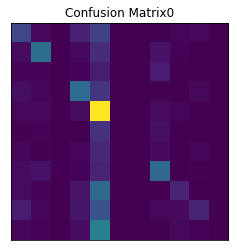

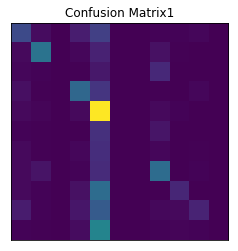

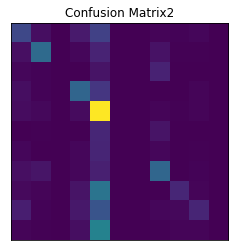

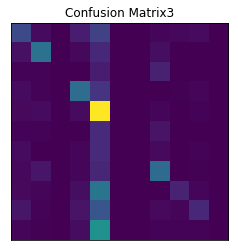

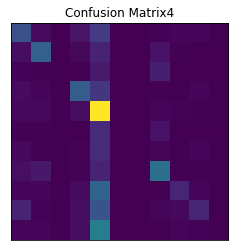

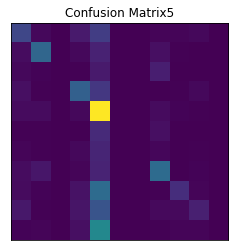

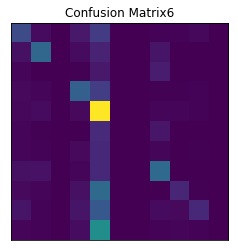

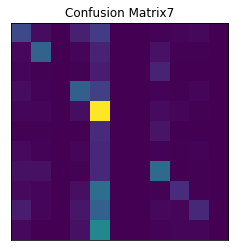

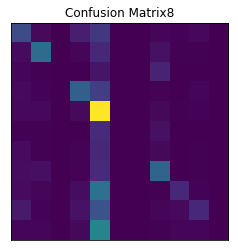

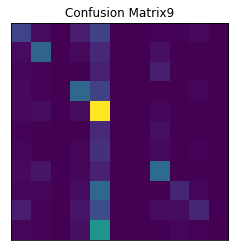

In [18]:
for i in range(len(conf_total)):
    plt.figure()
    plt.imshow(conf_total[i])
    plt.title("Confusion Matrix" + str(i)), plt.xticks([]), plt.yticks([])
    plt.show()

### Cross Validation using K-fold and Logistic Regression


In [20]:
from sklearn.linear_model import LogisticRegression


accuracy_log_total = []
precision_log_total = []
recall_log_total = []
conf_log_total = []
iteration_log = 0
iteration = 0

# perform cross-validation on the HoG features
for train_index, test_index in kf.split(total_hog):
    
    # train the logistic_regression_classifier
    log_reg = LogisticRegression()
    hog_train = total_hog[train_index]
    label_train = label_total[train_index]
    log_reg.fit(hog_train, label_train)
    
    # test trained svm with test images
    hog_test = total_hog[test_index]
    label_test = label_total[test_index]
    prediction = log_reg.predict(hog_test)

    print(label_test)
    print (prediction)
    
    # compare prediction with actual label and calculate num. of correct classifications
    correct = 0
    
    for i in range(len(prediction)):
        if prediction[i] == label_test[i]:
            correct += 1

    accuracy = correct/len(prediction)
    accuracy_log_total.append(accuracy)
    
    # calculate precision and store into the precision_total, which stores precision for each validation set
    # use of average mode'micro', which globally calculates TP / TP+FP. 
    precision = precision_score(label_test, prediction, average='micro') 
    precision_log_total.append(precision)
    
    # calcualte recall and store into the recall_total, which stores recall for each validation set
    # use of average mode'micro', which globally calculates TP / TP+FN
    recall = recall_score(label_test, prediction, average='micro')  
    recall_log_total.append(recall)
    
    # calculate confustion matrix
    conf = confusion_matrix(label_test, prediction)
    conf_log_total.append(conf)
    
    iteration = iteration + 1
    print("number of iteration: ", iteration)
    print("accuracy:",accuracy)
    print("precision:", precision)
    print("recall:", recall)
    print(" ")

[4 2 7 ... 7 4 0]
[4 7 7 ... 7 8 8]
number of iteration:  1
accuracy: 0.5806387225548902
precision: 0.5806387225548902
recall: 0.5806387225548902
 
[7 7 1 ... 4 7 3]
[0 7 1 ... 4 7 1]
number of iteration:  2
accuracy: 0.588622754491018
precision: 0.588622754491018
recall: 0.588622754491018
 
[7 4 1 ... 8 3 2]
[7 4 1 ... 8 3 7]
number of iteration:  3
accuracy: 0.5740518962075848
precision: 0.5740518962075848
recall: 0.5740518962075848
 
[8 4 8 ... 4 2 5]
[ 4  4  9 ...  4 10  4]
number of iteration:  4
accuracy: 0.577245508982036
precision: 0.577245508982036
recall: 0.577245508982036
 
[ 9  8 10 ...  7  3  9]
[4 4 4 ... 4 3 3]
number of iteration:  5
accuracy: 0.5914171656686626
precision: 0.5914171656686626
recall: 0.5914171656686626
 
[1 1 9 ... 8 9 5]
[0 1 4 ... 8 0 7]
number of iteration:  6
accuracy: 0.5816367265469062
precision: 0.5816367265469062
recall: 0.5816367265469062
 
[0 8 9 ... 4 4 8]
[9 0 9 ... 4 4 4]
number of iteration:  7
accuracy: 0.5728542914171657
precision: 0.5728

### Average accuuracy with standard deviation of logistic regression

In [35]:
average_log_accuracy = 0
for i in range (len(accuracy_log_total)):
    average_log_accuracy = average_log_accuracy + accuracy_log_total[i]
    
average_log_accuracy = average_log_accuracy/len(accuracy_log_total)
accuracy_log_total = np.asarray(accuracy_log_total)
std_log = np.std(accuracy_log_total)

print("average accuracy of logistic regression: ", average_log_accuracy)
print("standard deviation of average accuracy of logistic regression: ", std_log)

average accuracy of logistic regression:  0.5780039920159681
standard deviation of average accuracy of logistic regression:  0.007169976298793354


### Average precision and recall of logistic regression

In [36]:
average_log_precision = 0
for i in range (len(precision_log_total)):
    average_log_precision = average_log_precision + precision_log_total[i]
average_log_precision = average_log_precision/len(precision_log_total)

average_log_recall = 0
for i in range (len(recall_log_total)):
    average_log_recall = average_log_recall + recall_log_total[i]
average_log_recall = average_log_recall/len(recall_log_total)

print("average precision across validations: ", average_log_precision)
print("average recall across validations: ", average_log_recall)

average precision across validations:  0.5780039920159681
average recall across validations:  0.5780039920159681


### Display Confusion Matrices Generated by Logistic Regression

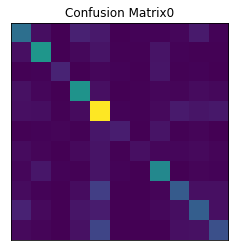

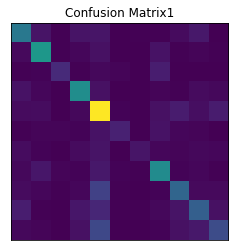

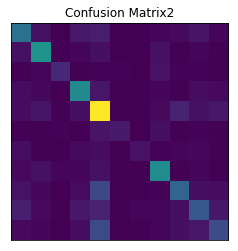

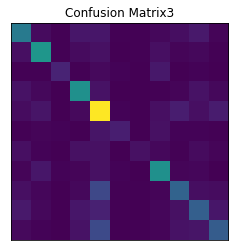

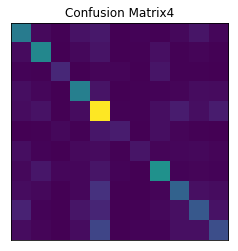

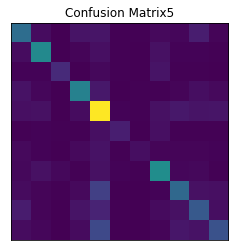

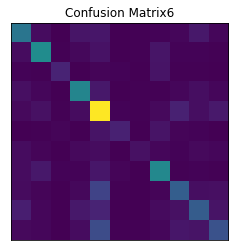

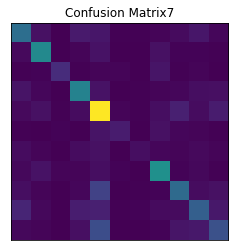

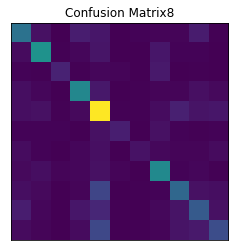

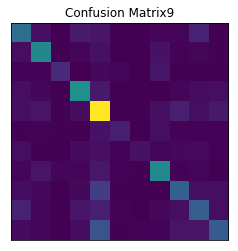

In [21]:
for i in range(len(conf_log_total)):
    plt.figure()
    plt.imshow(conf_log_total[i])
    plt.title("Confusion Matrix" + str(i)), plt.xticks([]), plt.yticks([])
    plt.show()


## All reasoning questions are in detail in Section 2.2 Q5 of the report. 